# GRF - examples 1D

Generate gaussian random fields (GRF) using fast Fourier transform (FFT).

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import from package 'geone'
import geone.covModel as gcm
import geone.grf as grf
#import geone.customcolors as ccol

### Remark
The matplotlib figures can be visualized in *interactive* mode:
- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Define a covariance model in 1D: class `covModel1D`

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).

In [2]:
cov_model = gcm.CovModel1D(elem=[
    ('gaussian', {'w':5., 'r':100}), # elementary contribution
    ('nugget', {'w':1.})             # elementary contribution
    ], name='model-1D example')

In [3]:
cov_model

Covariance model 1D: (Name = model-1D example)
   2 elementary contribution(s)
   Elementary contribution 0: type : gaussian
      parameters:  w = 5.0,  r = 100
   Elementary contribution 1: type : nugget
      parameters:  w = 1.0

### Plot the covariance / variogram function of the model

Plot the covariance function.

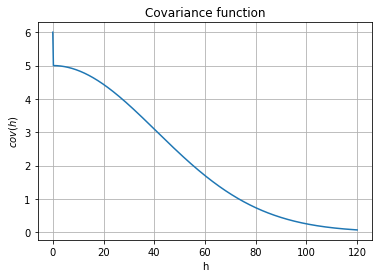

In [4]:
cov_model.plot_model()
plt.title('Covariance function')
plt.show()

Plot the variogram function.

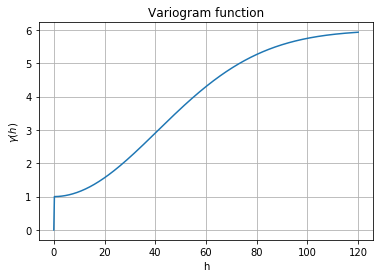

In [5]:
cov_model.plot_model(vario=True)
plt.title('Variogram function')
plt.show()

Plot the covariance and variogram functions in a same figure.

In [6]:
cov_model.plot_model(label='covar.')
cov_model.plot_model(vario=True, label='vario.')
plt.legend()
plt.title('Variogram function')
plt.show()

### Get the sill and range

In [7]:
w = cov_model.sill()
r = cov_model.r()
print('Sill = {}'.format(w))
print('Range = {}'.format(r))

Sill = 6.0
Range = 100


## Simulation of GRFs - 1D
Define the simulation grid.

In [8]:
nx = 1000 # number of cells
dx = 0.5  # cell unit
ox = 0.0  # origin

### Remark
As the generation of GRFs is based on FFT, periodic fields are generated. Hence, an extended simulation grid is used and then cropped after the simulation. The extension should be large enough in order to avoid wrong correlations, i.e. correlations across opposite borders of the grid, or correlations between two nodes regarding both distances between them (with respect to the periodic grid).

An appropriate extension is automatically computed by the function `grf1D` based on the covariance model class passed as first argument. However, the minimal extension can be given explicitly with the keyword argument `extensionMin`.

Note that a covariance function can be passed as first argument (in the example below, the function `cov_model.func()` instead of the class `cov_model`). In this situation, an appropriate minimal extension can be computed by the function `extension_min` (i.e. `extension_min(cov_model.r(), nx, dx)`), and then passed to the GRF simulator `grf1D` via the keyword argument `extensionMin`.

#### Notes
When passing the covariance model class as first argument, the extension is computed based on the range of the covariance. If the results show artefacts or unexpected features (this can happen when using Gaussian covariance model), one may try to fix the problem by increasing the extension. To do so, a factor (greather than one) can be specified via the keyword argument `rangeFactorForExtensionMin`: the range will be multiplied by this factor before computing the extension.

### Unconditional simulations
Set the number of realizations, the seed and launch the (unconditional) simulations.

*Remark:* the keyword argument `printInfo` (`True` by default) can be set to `False` to not display information when running.

In [9]:
nreal = 10000
np.random.seed(123)
sim1Da = grf.grf1D(cov_model, nx, dx, ox,nreal=nreal)
# sim1Da = grf.grf1D(cov_model, nx, dx, ox,nreal=nreal, printInfo=False)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Unconditional simulation    1-   2 of 10000...
GRF1D: Unconditional simulation    3-   4 of 10000...
GRF1D: Unconditional simulation    5-   6 of 10000...
GRF1D: Unconditional simulation    7-   8 of 10000...
GRF1D: Unconditional simulation    9-  10 of 10000...
GRF1D: Unconditional simulation   11-  12 of 10000...
GRF1D: Unconditional simulation   13-  14 of 10000...
GRF1D: Unconditional simulation   15-  16 of 10000...
GRF1D: Unconditional simulation   17-  18 of 10000...
GRF1D: Unconditional simulation   19-  20 of 10000...
GRF1D: Unconditional simulation   21-  22 of 10000...
GRF1D: Unconditional simulation   23-  24 of 10000...
GRF1D: Unconditional simulation   25-  26 of 10000...
GRF1D: Unconditional simulation   27-  28 of 10000...
GRF1D: Unconditional simulation   29-  30 of 10000...
GRF1D: Unconditional simulation   31-  

GRF1D: Unconditional simulation  499- 500 of 10000...
GRF1D: Unconditional simulation  501- 502 of 10000...
GRF1D: Unconditional simulation  503- 504 of 10000...
GRF1D: Unconditional simulation  505- 506 of 10000...
GRF1D: Unconditional simulation  507- 508 of 10000...
GRF1D: Unconditional simulation  509- 510 of 10000...
GRF1D: Unconditional simulation  511- 512 of 10000...
GRF1D: Unconditional simulation  513- 514 of 10000...
GRF1D: Unconditional simulation  515- 516 of 10000...
GRF1D: Unconditional simulation  517- 518 of 10000...
GRF1D: Unconditional simulation  519- 520 of 10000...
GRF1D: Unconditional simulation  521- 522 of 10000...
GRF1D: Unconditional simulation  523- 524 of 10000...
GRF1D: Unconditional simulation  525- 526 of 10000...
GRF1D: Unconditional simulation  527- 528 of 10000...
GRF1D: Unconditional simulation  529- 530 of 10000...
GRF1D: Unconditional simulation  531- 532 of 10000...
GRF1D: Unconditional simulation  533- 534 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 1413-1414 of 10000...
GRF1D: Unconditional simulation 1415-1416 of 10000...
GRF1D: Unconditional simulation 1417-1418 of 10000...
GRF1D: Unconditional simulation 1419-1420 of 10000...
GRF1D: Unconditional simulation 1421-1422 of 10000...
GRF1D: Unconditional simulation 1423-1424 of 10000...
GRF1D: Unconditional simulation 1425-1426 of 10000...
GRF1D: Unconditional simulation 1427-1428 of 10000...
GRF1D: Unconditional simulation 1429-1430 of 10000...
GRF1D: Unconditional simulation 1431-1432 of 10000...
GRF1D: Unconditional simulation 1433-1434 of 10000...
GRF1D: Unconditional simulation 1435-1436 of 10000...
GRF1D: Unconditional simulation 1437-1438 of 10000...
GRF1D: Unconditional simulation 1439-1440 of 10000...
GRF1D: Unconditional simulation 1441-1442 of 10000...
GRF1D: Unconditional simulation 1443-1444 of 10000...
GRF1D: Unconditional simulation 1445-1446 of 10000...
GRF1D: Unconditional simulation 1447-1448 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 2409-2410 of 10000...
GRF1D: Unconditional simulation 2411-2412 of 10000...
GRF1D: Unconditional simulation 2413-2414 of 10000...
GRF1D: Unconditional simulation 2415-2416 of 10000...
GRF1D: Unconditional simulation 2417-2418 of 10000...
GRF1D: Unconditional simulation 2419-2420 of 10000...
GRF1D: Unconditional simulation 2421-2422 of 10000...
GRF1D: Unconditional simulation 2423-2424 of 10000...
GRF1D: Unconditional simulation 2425-2426 of 10000...
GRF1D: Unconditional simulation 2427-2428 of 10000...
GRF1D: Unconditional simulation 2429-2430 of 10000...
GRF1D: Unconditional simulation 2431-2432 of 10000...
GRF1D: Unconditional simulation 2433-2434 of 10000...
GRF1D: Unconditional simulation 2435-2436 of 10000...
GRF1D: Unconditional simulation 2437-2438 of 10000...
GRF1D: Unconditional simulation 2439-2440 of 10000...
GRF1D: Unconditional simulation 2441-2442 of 10000...
GRF1D: Unconditional simulation 2443-2444 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 2721-2722 of 10000...
GRF1D: Unconditional simulation 2723-2724 of 10000...
GRF1D: Unconditional simulation 2725-2726 of 10000...
GRF1D: Unconditional simulation 2727-2728 of 10000...
GRF1D: Unconditional simulation 2729-2730 of 10000...
GRF1D: Unconditional simulation 2731-2732 of 10000...
GRF1D: Unconditional simulation 2733-2734 of 10000...
GRF1D: Unconditional simulation 2735-2736 of 10000...
GRF1D: Unconditional simulation 2737-2738 of 10000...
GRF1D: Unconditional simulation 2739-2740 of 10000...
GRF1D: Unconditional simulation 2741-2742 of 10000...
GRF1D: Unconditional simulation 2743-2744 of 10000...
GRF1D: Unconditional simulation 2745-2746 of 10000...
GRF1D: Unconditional simulation 2747-2748 of 10000...
GRF1D: Unconditional simulation 2749-2750 of 10000...
GRF1D: Unconditional simulation 2751-2752 of 10000...
GRF1D: Unconditional simulation 2753-2754 of 10000...
GRF1D: Unconditional simulation 2755-2756 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 3513-3514 of 10000...
GRF1D: Unconditional simulation 3515-3516 of 10000...
GRF1D: Unconditional simulation 3517-3518 of 10000...
GRF1D: Unconditional simulation 3519-3520 of 10000...
GRF1D: Unconditional simulation 3521-3522 of 10000...
GRF1D: Unconditional simulation 3523-3524 of 10000...
GRF1D: Unconditional simulation 3525-3526 of 10000...
GRF1D: Unconditional simulation 3527-3528 of 10000...
GRF1D: Unconditional simulation 3529-3530 of 10000...
GRF1D: Unconditional simulation 3531-3532 of 10000...
GRF1D: Unconditional simulation 3533-3534 of 10000...
GRF1D: Unconditional simulation 3535-3536 of 10000...
GRF1D: Unconditional simulation 3537-3538 of 10000...
GRF1D: Unconditional simulation 3539-3540 of 10000...
GRF1D: Unconditional simulation 3541-3542 of 10000...
GRF1D: Unconditional simulation 3543-3544 of 10000...
GRF1D: Unconditional simulation 3545-3546 of 10000...
GRF1D: Unconditional simulation 3547-3548 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 3845-3846 of 10000...
GRF1D: Unconditional simulation 3847-3848 of 10000...
GRF1D: Unconditional simulation 3849-3850 of 10000...
GRF1D: Unconditional simulation 3851-3852 of 10000...
GRF1D: Unconditional simulation 3853-3854 of 10000...
GRF1D: Unconditional simulation 3855-3856 of 10000...
GRF1D: Unconditional simulation 3857-3858 of 10000...
GRF1D: Unconditional simulation 3859-3860 of 10000...
GRF1D: Unconditional simulation 3861-3862 of 10000...
GRF1D: Unconditional simulation 3863-3864 of 10000...
GRF1D: Unconditional simulation 3865-3866 of 10000...
GRF1D: Unconditional simulation 3867-3868 of 10000...
GRF1D: Unconditional simulation 3869-3870 of 10000...
GRF1D: Unconditional simulation 3871-3872 of 10000...
GRF1D: Unconditional simulation 3873-3874 of 10000...
GRF1D: Unconditional simulation 3875-3876 of 10000...
GRF1D: Unconditional simulation 3877-3878 of 10000...
GRF1D: Unconditional simulation 3879-3880 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 4737-4738 of 10000...
GRF1D: Unconditional simulation 4739-4740 of 10000...
GRF1D: Unconditional simulation 4741-4742 of 10000...
GRF1D: Unconditional simulation 4743-4744 of 10000...
GRF1D: Unconditional simulation 4745-4746 of 10000...
GRF1D: Unconditional simulation 4747-4748 of 10000...
GRF1D: Unconditional simulation 4749-4750 of 10000...
GRF1D: Unconditional simulation 4751-4752 of 10000...
GRF1D: Unconditional simulation 4753-4754 of 10000...
GRF1D: Unconditional simulation 4755-4756 of 10000...
GRF1D: Unconditional simulation 4757-4758 of 10000...
GRF1D: Unconditional simulation 4759-4760 of 10000...
GRF1D: Unconditional simulation 4761-4762 of 10000...
GRF1D: Unconditional simulation 4763-4764 of 10000...
GRF1D: Unconditional simulation 4765-4766 of 10000...
GRF1D: Unconditional simulation 4767-4768 of 10000...
GRF1D: Unconditional simulation 4769-4770 of 10000...
GRF1D: Unconditional simulation 4771-4772 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 5121-5122 of 10000...
GRF1D: Unconditional simulation 5123-5124 of 10000...
GRF1D: Unconditional simulation 5125-5126 of 10000...
GRF1D: Unconditional simulation 5127-5128 of 10000...
GRF1D: Unconditional simulation 5129-5130 of 10000...
GRF1D: Unconditional simulation 5131-5132 of 10000...
GRF1D: Unconditional simulation 5133-5134 of 10000...
GRF1D: Unconditional simulation 5135-5136 of 10000...
GRF1D: Unconditional simulation 5137-5138 of 10000...
GRF1D: Unconditional simulation 5139-5140 of 10000...
GRF1D: Unconditional simulation 5141-5142 of 10000...
GRF1D: Unconditional simulation 5143-5144 of 10000...
GRF1D: Unconditional simulation 5145-5146 of 10000...
GRF1D: Unconditional simulation 5147-5148 of 10000...
GRF1D: Unconditional simulation 5149-5150 of 10000...
GRF1D: Unconditional simulation 5151-5152 of 10000...
GRF1D: Unconditional simulation 5153-5154 of 10000...
GRF1D: Unconditional simulation 5155-5156 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 6059-6060 of 10000...
GRF1D: Unconditional simulation 6061-6062 of 10000...
GRF1D: Unconditional simulation 6063-6064 of 10000...
GRF1D: Unconditional simulation 6065-6066 of 10000...
GRF1D: Unconditional simulation 6067-6068 of 10000...
GRF1D: Unconditional simulation 6069-6070 of 10000...
GRF1D: Unconditional simulation 6071-6072 of 10000...
GRF1D: Unconditional simulation 6073-6074 of 10000...
GRF1D: Unconditional simulation 6075-6076 of 10000...
GRF1D: Unconditional simulation 6077-6078 of 10000...
GRF1D: Unconditional simulation 6079-6080 of 10000...
GRF1D: Unconditional simulation 6081-6082 of 10000...
GRF1D: Unconditional simulation 6083-6084 of 10000...
GRF1D: Unconditional simulation 6085-6086 of 10000...
GRF1D: Unconditional simulation 6087-6088 of 10000...
GRF1D: Unconditional simulation 6089-6090 of 10000...
GRF1D: Unconditional simulation 6091-6092 of 10000...
GRF1D: Unconditional simulation 6093-6094 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 6457-6458 of 10000...
GRF1D: Unconditional simulation 6459-6460 of 10000...
GRF1D: Unconditional simulation 6461-6462 of 10000...
GRF1D: Unconditional simulation 6463-6464 of 10000...
GRF1D: Unconditional simulation 6465-6466 of 10000...
GRF1D: Unconditional simulation 6467-6468 of 10000...
GRF1D: Unconditional simulation 6469-6470 of 10000...
GRF1D: Unconditional simulation 6471-6472 of 10000...
GRF1D: Unconditional simulation 6473-6474 of 10000...
GRF1D: Unconditional simulation 6475-6476 of 10000...
GRF1D: Unconditional simulation 6477-6478 of 10000...
GRF1D: Unconditional simulation 6479-6480 of 10000...
GRF1D: Unconditional simulation 6481-6482 of 10000...
GRF1D: Unconditional simulation 6483-6484 of 10000...
GRF1D: Unconditional simulation 6485-6486 of 10000...
GRF1D: Unconditional simulation 6487-6488 of 10000...
GRF1D: Unconditional simulation 6489-6490 of 10000...
GRF1D: Unconditional simulation 6491-6492 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 7297-7298 of 10000...
GRF1D: Unconditional simulation 7299-7300 of 10000...
GRF1D: Unconditional simulation 7301-7302 of 10000...
GRF1D: Unconditional simulation 7303-7304 of 10000...
GRF1D: Unconditional simulation 7305-7306 of 10000...
GRF1D: Unconditional simulation 7307-7308 of 10000...
GRF1D: Unconditional simulation 7309-7310 of 10000...
GRF1D: Unconditional simulation 7311-7312 of 10000...
GRF1D: Unconditional simulation 7313-7314 of 10000...
GRF1D: Unconditional simulation 7315-7316 of 10000...
GRF1D: Unconditional simulation 7317-7318 of 10000...
GRF1D: Unconditional simulation 7319-7320 of 10000...
GRF1D: Unconditional simulation 7321-7322 of 10000...
GRF1D: Unconditional simulation 7323-7324 of 10000...
GRF1D: Unconditional simulation 7325-7326 of 10000...
GRF1D: Unconditional simulation 7327-7328 of 10000...
GRF1D: Unconditional simulation 7329-7330 of 10000...
GRF1D: Unconditional simulation 7331-7332 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 7667-7668 of 10000...
GRF1D: Unconditional simulation 7669-7670 of 10000...
GRF1D: Unconditional simulation 7671-7672 of 10000...
GRF1D: Unconditional simulation 7673-7674 of 10000...
GRF1D: Unconditional simulation 7675-7676 of 10000...
GRF1D: Unconditional simulation 7677-7678 of 10000...
GRF1D: Unconditional simulation 7679-7680 of 10000...
GRF1D: Unconditional simulation 7681-7682 of 10000...
GRF1D: Unconditional simulation 7683-7684 of 10000...
GRF1D: Unconditional simulation 7685-7686 of 10000...
GRF1D: Unconditional simulation 7687-7688 of 10000...
GRF1D: Unconditional simulation 7689-7690 of 10000...
GRF1D: Unconditional simulation 7691-7692 of 10000...
GRF1D: Unconditional simulation 7693-7694 of 10000...
GRF1D: Unconditional simulation 7695-7696 of 10000...
GRF1D: Unconditional simulation 7697-7698 of 10000...
GRF1D: Unconditional simulation 7699-7700 of 10000...
GRF1D: Unconditional simulation 7701-7702 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 8581-8582 of 10000...
GRF1D: Unconditional simulation 8583-8584 of 10000...
GRF1D: Unconditional simulation 8585-8586 of 10000...
GRF1D: Unconditional simulation 8587-8588 of 10000...
GRF1D: Unconditional simulation 8589-8590 of 10000...
GRF1D: Unconditional simulation 8591-8592 of 10000...
GRF1D: Unconditional simulation 8593-8594 of 10000...
GRF1D: Unconditional simulation 8595-8596 of 10000...
GRF1D: Unconditional simulation 8597-8598 of 10000...
GRF1D: Unconditional simulation 8599-8600 of 10000...
GRF1D: Unconditional simulation 8601-8602 of 10000...
GRF1D: Unconditional simulation 8603-8604 of 10000...
GRF1D: Unconditional simulation 8605-8606 of 10000...
GRF1D: Unconditional simulation 8607-8608 of 10000...
GRF1D: Unconditional simulation 8609-8610 of 10000...
GRF1D: Unconditional simulation 8611-8612 of 10000...
GRF1D: Unconditional simulation 8613-8614 of 10000...
GRF1D: Unconditional simulation 8615-8616 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 8927-8928 of 10000...
GRF1D: Unconditional simulation 8929-8930 of 10000...
GRF1D: Unconditional simulation 8931-8932 of 10000...
GRF1D: Unconditional simulation 8933-8934 of 10000...
GRF1D: Unconditional simulation 8935-8936 of 10000...
GRF1D: Unconditional simulation 8937-8938 of 10000...
GRF1D: Unconditional simulation 8939-8940 of 10000...
GRF1D: Unconditional simulation 8941-8942 of 10000...
GRF1D: Unconditional simulation 8943-8944 of 10000...
GRF1D: Unconditional simulation 8945-8946 of 10000...
GRF1D: Unconditional simulation 8947-8948 of 10000...
GRF1D: Unconditional simulation 8949-8950 of 10000...
GRF1D: Unconditional simulation 8951-8952 of 10000...
GRF1D: Unconditional simulation 8953-8954 of 10000...
GRF1D: Unconditional simulation 8955-8956 of 10000...
GRF1D: Unconditional simulation 8957-8958 of 10000...
GRF1D: Unconditional simulation 8959-8960 of 10000...
GRF1D: Unconditional simulation 8961-8962 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 9685-9686 of 10000...
GRF1D: Unconditional simulation 9687-9688 of 10000...
GRF1D: Unconditional simulation 9689-9690 of 10000...
GRF1D: Unconditional simulation 9691-9692 of 10000...
GRF1D: Unconditional simulation 9693-9694 of 10000...
GRF1D: Unconditional simulation 9695-9696 of 10000...
GRF1D: Unconditional simulation 9697-9698 of 10000...
GRF1D: Unconditional simulation 9699-9700 of 10000...
GRF1D: Unconditional simulation 9701-9702 of 10000...
GRF1D: Unconditional simulation 9703-9704 of 10000...
GRF1D: Unconditional simulation 9705-9706 of 10000...
GRF1D: Unconditional simulation 9707-9708 of 10000...
GRF1D: Unconditional simulation 9709-9710 of 10000...
GRF1D: Unconditional simulation 9711-9712 of 10000...
GRF1D: Unconditional simulation 9713-9714 of 10000...
GRF1D: Unconditional simulation 9715-9716 of 10000...
GRF1D: Unconditional simulation 9717-9718 of 10000...
GRF1D: Unconditional simulation 9719-9720 of 10000...
GRF1D: Unconditional simulat

The result is a 2d array of size `nreal` by `nx`:

In [10]:
sim1Da.shape

(10000, 1000)

Compute the mean and the standard deviation over the realizations (pixel-wise).

In [11]:
sim1Da_mean = np.mean(sim1Da, axis=0)
sim1Da_std = np.std(sim1Da, axis=0)

Plot the first realizations, the mean, and the mean +/- standard deviation.

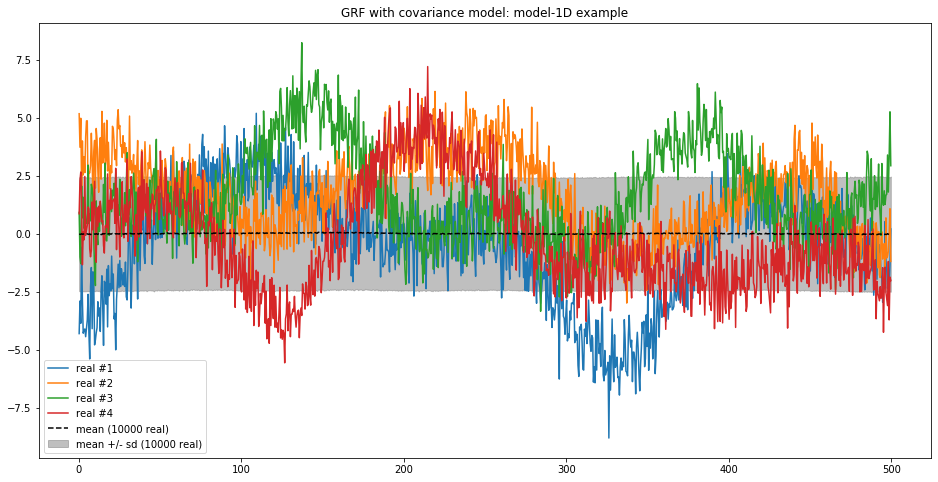

In [12]:
xg = ox + dx*(0.5+np.arange(nx)) # center of grid cells

plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Da[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Da_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.fill_between(xg, sim1Da_mean - sim1Da_std, sim1Da_mean + sim1Da_std, 
                 color='gray', alpha=.5, label='mean +/- sd ({} real)'.format(nreal))
plt.legend()
plt.title('GRF with covariance model: {}'.format(cov_model.name))
plt.show()

### Conditional simulations
Define hard data. Note that the conditioning values will be attached to the grid cells containing the corresponding conditioning locations.

In [13]:
x = [10.1, 50.7, 238.5, 384.3] # locations (real coordinates)
v = [-3.2,  1.2,   4.7,  -2.0] # values

Launch the simulations and plot.

In [14]:
np.random.seed(123)
sim1Db = grf.grf1D(cov_model, nx, dx, ox, x=x, v=v, nreal=nreal)
sim1Db_mean = np.mean(sim1Db, axis=0)
sim1Db_std = np.std(sim1Db, axis=0)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Treatment of conditioning data...
GRF1D: Computing covariance matrix (rAA) for conditioning locations...
GRF1D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF1D: Unconditional simulation    1-   2 of 10000...
GRF1D: Unconditional simulation    3-   4 of 10000...
GRF1D: Unconditional simulation    5-   6 of 10000...
GRF1D: Unconditional simulation    7-   8 of 10000...
GRF1D: Unconditional simulation    9-  10 of 10000...
GRF1D: Unconditional simulation   11-  12 of 10000...
GRF1D: Unconditional simulation   13-  14 of 10000...
GRF1D: Unconditional simulation   15-  16 of 10000...
GRF1D: Unconditional simulation   17-  18 of 10000...
GRF1D: Unconditional simulation   19-  20 of 10000...
GRF1D: Unconditional simulation   21-  22 of 10000...
GRF1D: Unconditional simulation   23-  24 of 1000

GRF1D: Unconditional simulation 1433-1434 of 10000...
GRF1D: Unconditional simulation 1435-1436 of 10000...
GRF1D: Unconditional simulation 1437-1438 of 10000...
GRF1D: Unconditional simulation 1439-1440 of 10000...
GRF1D: Unconditional simulation 1441-1442 of 10000...
GRF1D: Unconditional simulation 1443-1444 of 10000...
GRF1D: Unconditional simulation 1445-1446 of 10000...
GRF1D: Unconditional simulation 1447-1448 of 10000...
GRF1D: Unconditional simulation 1449-1450 of 10000...
GRF1D: Unconditional simulation 1451-1452 of 10000...
GRF1D: Unconditional simulation 1453-1454 of 10000...
GRF1D: Unconditional simulation 1455-1456 of 10000...
GRF1D: Unconditional simulation 1457-1458 of 10000...
GRF1D: Unconditional simulation 1459-1460 of 10000...
GRF1D: Unconditional simulation 1461-1462 of 10000...
GRF1D: Unconditional simulation 1463-1464 of 10000...
GRF1D: Unconditional simulation 1465-1466 of 10000...
GRF1D: Unconditional simulation 1467-1468 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 2799-2800 of 10000...
GRF1D: Unconditional simulation 2801-2802 of 10000...
GRF1D: Unconditional simulation 2803-2804 of 10000...
GRF1D: Unconditional simulation 2805-2806 of 10000...
GRF1D: Unconditional simulation 2807-2808 of 10000...
GRF1D: Unconditional simulation 2809-2810 of 10000...
GRF1D: Unconditional simulation 2811-2812 of 10000...
GRF1D: Unconditional simulation 2813-2814 of 10000...
GRF1D: Unconditional simulation 2815-2816 of 10000...
GRF1D: Unconditional simulation 2817-2818 of 10000...
GRF1D: Unconditional simulation 2819-2820 of 10000...
GRF1D: Unconditional simulation 2821-2822 of 10000...
GRF1D: Unconditional simulation 2823-2824 of 10000...
GRF1D: Unconditional simulation 2825-2826 of 10000...
GRF1D: Unconditional simulation 2827-2828 of 10000...
GRF1D: Unconditional simulation 2829-2830 of 10000...
GRF1D: Unconditional simulation 2831-2832 of 10000...
GRF1D: Unconditional simulation 2833-2834 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 3943-3944 of 10000...
GRF1D: Unconditional simulation 3945-3946 of 10000...
GRF1D: Unconditional simulation 3947-3948 of 10000...
GRF1D: Unconditional simulation 3949-3950 of 10000...
GRF1D: Unconditional simulation 3951-3952 of 10000...
GRF1D: Unconditional simulation 3953-3954 of 10000...
GRF1D: Unconditional simulation 3955-3956 of 10000...
GRF1D: Unconditional simulation 3957-3958 of 10000...
GRF1D: Unconditional simulation 3959-3960 of 10000...
GRF1D: Unconditional simulation 3961-3962 of 10000...
GRF1D: Unconditional simulation 3963-3964 of 10000...
GRF1D: Unconditional simulation 3965-3966 of 10000...
GRF1D: Unconditional simulation 3967-3968 of 10000...
GRF1D: Unconditional simulation 3969-3970 of 10000...
GRF1D: Unconditional simulation 3971-3972 of 10000...
GRF1D: Unconditional simulation 3973-3974 of 10000...
GRF1D: Unconditional simulation 3975-3976 of 10000...
GRF1D: Unconditional simulation 3977-3978 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 5279-5280 of 10000...
GRF1D: Unconditional simulation 5281-5282 of 10000...
GRF1D: Unconditional simulation 5283-5284 of 10000...
GRF1D: Unconditional simulation 5285-5286 of 10000...
GRF1D: Unconditional simulation 5287-5288 of 10000...
GRF1D: Unconditional simulation 5289-5290 of 10000...
GRF1D: Unconditional simulation 5291-5292 of 10000...
GRF1D: Unconditional simulation 5293-5294 of 10000...
GRF1D: Unconditional simulation 5295-5296 of 10000...
GRF1D: Unconditional simulation 5297-5298 of 10000...
GRF1D: Unconditional simulation 5299-5300 of 10000...
GRF1D: Unconditional simulation 5301-5302 of 10000...
GRF1D: Unconditional simulation 5303-5304 of 10000...
GRF1D: Unconditional simulation 5305-5306 of 10000...
GRF1D: Unconditional simulation 5307-5308 of 10000...
GRF1D: Unconditional simulation 5309-5310 of 10000...
GRF1D: Unconditional simulation 5311-5312 of 10000...
GRF1D: Unconditional simulation 5313-5314 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 6797-6798 of 10000...
GRF1D: Unconditional simulation 6799-6800 of 10000...
GRF1D: Unconditional simulation 6801-6802 of 10000...
GRF1D: Unconditional simulation 6803-6804 of 10000...
GRF1D: Unconditional simulation 6805-6806 of 10000...
GRF1D: Unconditional simulation 6807-6808 of 10000...
GRF1D: Unconditional simulation 6809-6810 of 10000...
GRF1D: Unconditional simulation 6811-6812 of 10000...
GRF1D: Unconditional simulation 6813-6814 of 10000...
GRF1D: Unconditional simulation 6815-6816 of 10000...
GRF1D: Unconditional simulation 6817-6818 of 10000...
GRF1D: Unconditional simulation 6819-6820 of 10000...
GRF1D: Unconditional simulation 6821-6822 of 10000...
GRF1D: Unconditional simulation 6823-6824 of 10000...
GRF1D: Unconditional simulation 6825-6826 of 10000...
GRF1D: Unconditional simulation 6827-6828 of 10000...
GRF1D: Unconditional simulation 6829-6830 of 10000...
GRF1D: Unconditional simulation 6831-6832 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 8217-8218 of 10000...
GRF1D: Unconditional simulation 8219-8220 of 10000...
GRF1D: Unconditional simulation 8221-8222 of 10000...
GRF1D: Unconditional simulation 8223-8224 of 10000...
GRF1D: Unconditional simulation 8225-8226 of 10000...
GRF1D: Unconditional simulation 8227-8228 of 10000...
GRF1D: Unconditional simulation 8229-8230 of 10000...
GRF1D: Unconditional simulation 8231-8232 of 10000...
GRF1D: Unconditional simulation 8233-8234 of 10000...
GRF1D: Unconditional simulation 8235-8236 of 10000...
GRF1D: Unconditional simulation 8237-8238 of 10000...
GRF1D: Unconditional simulation 8239-8240 of 10000...
GRF1D: Unconditional simulation 8241-8242 of 10000...
GRF1D: Unconditional simulation 8243-8244 of 10000...
GRF1D: Unconditional simulation 8245-8246 of 10000...
GRF1D: Unconditional simulation 8247-8248 of 10000...
GRF1D: Unconditional simulation 8249-8250 of 10000...
GRF1D: Unconditional simulation 8251-8252 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 9667-9668 of 10000...
GRF1D: Unconditional simulation 9669-9670 of 10000...
GRF1D: Unconditional simulation 9671-9672 of 10000...
GRF1D: Unconditional simulation 9673-9674 of 10000...
GRF1D: Unconditional simulation 9675-9676 of 10000...
GRF1D: Unconditional simulation 9677-9678 of 10000...
GRF1D: Unconditional simulation 9679-9680 of 10000...
GRF1D: Unconditional simulation 9681-9682 of 10000...
GRF1D: Unconditional simulation 9683-9684 of 10000...
GRF1D: Unconditional simulation 9685-9686 of 10000...
GRF1D: Unconditional simulation 9687-9688 of 10000...
GRF1D: Unconditional simulation 9689-9690 of 10000...
GRF1D: Unconditional simulation 9691-9692 of 10000...
GRF1D: Unconditional simulation 9693-9694 of 10000...
GRF1D: Unconditional simulation 9695-9696 of 10000...
GRF1D: Unconditional simulation 9697-9698 of 10000...
GRF1D: Unconditional simulation 9699-9700 of 10000...
GRF1D: Unconditional simulation 9701-9702 of 10000...
GRF1D: Unconditional simulat

GRF1D: Updating conditional simulation  628 of 10000...
GRF1D: Updating conditional simulation  629 of 10000...
GRF1D: Updating conditional simulation  630 of 10000...
GRF1D: Updating conditional simulation  631 of 10000...
GRF1D: Updating conditional simulation  632 of 10000...
GRF1D: Updating conditional simulation  633 of 10000...
GRF1D: Updating conditional simulation  634 of 10000...
GRF1D: Updating conditional simulation  635 of 10000...
GRF1D: Updating conditional simulation  636 of 10000...
GRF1D: Updating conditional simulation  637 of 10000...
GRF1D: Updating conditional simulation  638 of 10000...
GRF1D: Updating conditional simulation  639 of 10000...
GRF1D: Updating conditional simulation  640 of 10000...
GRF1D: Updating conditional simulation  641 of 10000...
GRF1D: Updating conditional simulation  642 of 10000...
GRF1D: Updating conditional simulation  643 of 10000...
GRF1D: Updating conditional simulation  644 of 10000...
GRF1D: Updating conditional simulation  645 of 1

GRF1D: Updating conditional simulation 1550 of 10000...
GRF1D: Updating conditional simulation 1551 of 10000...
GRF1D: Updating conditional simulation 1552 of 10000...
GRF1D: Updating conditional simulation 1553 of 10000...
GRF1D: Updating conditional simulation 1554 of 10000...
GRF1D: Updating conditional simulation 1555 of 10000...
GRF1D: Updating conditional simulation 1556 of 10000...
GRF1D: Updating conditional simulation 1557 of 10000...
GRF1D: Updating conditional simulation 1558 of 10000...
GRF1D: Updating conditional simulation 1559 of 10000...
GRF1D: Updating conditional simulation 1560 of 10000...
GRF1D: Updating conditional simulation 1561 of 10000...
GRF1D: Updating conditional simulation 1562 of 10000...
GRF1D: Updating conditional simulation 1563 of 10000...
GRF1D: Updating conditional simulation 1564 of 10000...
GRF1D: Updating conditional simulation 1565 of 10000...
GRF1D: Updating conditional simulation 1566 of 10000...
GRF1D: Updating conditional simulation 1567 of 1

GRF1D: Updating conditional simulation 2475 of 10000...
GRF1D: Updating conditional simulation 2476 of 10000...
GRF1D: Updating conditional simulation 2477 of 10000...
GRF1D: Updating conditional simulation 2478 of 10000...
GRF1D: Updating conditional simulation 2479 of 10000...
GRF1D: Updating conditional simulation 2480 of 10000...
GRF1D: Updating conditional simulation 2481 of 10000...
GRF1D: Updating conditional simulation 2482 of 10000...
GRF1D: Updating conditional simulation 2483 of 10000...
GRF1D: Updating conditional simulation 2484 of 10000...
GRF1D: Updating conditional simulation 2485 of 10000...
GRF1D: Updating conditional simulation 2486 of 10000...
GRF1D: Updating conditional simulation 2487 of 10000...
GRF1D: Updating conditional simulation 2488 of 10000...
GRF1D: Updating conditional simulation 2489 of 10000...
GRF1D: Updating conditional simulation 2490 of 10000...
GRF1D: Updating conditional simulation 2491 of 10000...
GRF1D: Updating conditional simulation 2492 of 1

GRF1D: Updating conditional simulation 3469 of 10000...
GRF1D: Updating conditional simulation 3470 of 10000...
GRF1D: Updating conditional simulation 3471 of 10000...
GRF1D: Updating conditional simulation 3472 of 10000...
GRF1D: Updating conditional simulation 3473 of 10000...
GRF1D: Updating conditional simulation 3474 of 10000...
GRF1D: Updating conditional simulation 3475 of 10000...
GRF1D: Updating conditional simulation 3476 of 10000...
GRF1D: Updating conditional simulation 3477 of 10000...
GRF1D: Updating conditional simulation 3478 of 10000...
GRF1D: Updating conditional simulation 3479 of 10000...
GRF1D: Updating conditional simulation 3480 of 10000...
GRF1D: Updating conditional simulation 3481 of 10000...
GRF1D: Updating conditional simulation 3482 of 10000...
GRF1D: Updating conditional simulation 3483 of 10000...
GRF1D: Updating conditional simulation 3484 of 10000...
GRF1D: Updating conditional simulation 3485 of 10000...
GRF1D: Updating conditional simulation 3486 of 1

GRF1D: Updating conditional simulation 4241 of 10000...
GRF1D: Updating conditional simulation 4242 of 10000...
GRF1D: Updating conditional simulation 4243 of 10000...
GRF1D: Updating conditional simulation 4244 of 10000...
GRF1D: Updating conditional simulation 4245 of 10000...
GRF1D: Updating conditional simulation 4246 of 10000...
GRF1D: Updating conditional simulation 4247 of 10000...
GRF1D: Updating conditional simulation 4248 of 10000...
GRF1D: Updating conditional simulation 4249 of 10000...
GRF1D: Updating conditional simulation 4250 of 10000...
GRF1D: Updating conditional simulation 4251 of 10000...
GRF1D: Updating conditional simulation 4252 of 10000...
GRF1D: Updating conditional simulation 4253 of 10000...
GRF1D: Updating conditional simulation 4254 of 10000...
GRF1D: Updating conditional simulation 4255 of 10000...
GRF1D: Updating conditional simulation 4256 of 10000...
GRF1D: Updating conditional simulation 4257 of 10000...
GRF1D: Updating conditional simulation 4258 of 1

GRF1D: Updating conditional simulation 5141 of 10000...
GRF1D: Updating conditional simulation 5142 of 10000...
GRF1D: Updating conditional simulation 5143 of 10000...
GRF1D: Updating conditional simulation 5144 of 10000...
GRF1D: Updating conditional simulation 5145 of 10000...
GRF1D: Updating conditional simulation 5146 of 10000...
GRF1D: Updating conditional simulation 5147 of 10000...
GRF1D: Updating conditional simulation 5148 of 10000...
GRF1D: Updating conditional simulation 5149 of 10000...
GRF1D: Updating conditional simulation 5150 of 10000...
GRF1D: Updating conditional simulation 5151 of 10000...
GRF1D: Updating conditional simulation 5152 of 10000...
GRF1D: Updating conditional simulation 5153 of 10000...
GRF1D: Updating conditional simulation 5154 of 10000...
GRF1D: Updating conditional simulation 5155 of 10000...
GRF1D: Updating conditional simulation 5156 of 10000...
GRF1D: Updating conditional simulation 5157 of 10000...
GRF1D: Updating conditional simulation 5158 of 1

GRF1D: Updating conditional simulation 6018 of 10000...
GRF1D: Updating conditional simulation 6019 of 10000...
GRF1D: Updating conditional simulation 6020 of 10000...
GRF1D: Updating conditional simulation 6021 of 10000...
GRF1D: Updating conditional simulation 6022 of 10000...
GRF1D: Updating conditional simulation 6023 of 10000...
GRF1D: Updating conditional simulation 6024 of 10000...
GRF1D: Updating conditional simulation 6025 of 10000...
GRF1D: Updating conditional simulation 6026 of 10000...
GRF1D: Updating conditional simulation 6027 of 10000...
GRF1D: Updating conditional simulation 6028 of 10000...
GRF1D: Updating conditional simulation 6029 of 10000...
GRF1D: Updating conditional simulation 6030 of 10000...
GRF1D: Updating conditional simulation 6031 of 10000...
GRF1D: Updating conditional simulation 6032 of 10000...
GRF1D: Updating conditional simulation 6033 of 10000...
GRF1D: Updating conditional simulation 6034 of 10000...
GRF1D: Updating conditional simulation 6035 of 1

GRF1D: Updating conditional simulation 6949 of 10000...
GRF1D: Updating conditional simulation 6950 of 10000...
GRF1D: Updating conditional simulation 6951 of 10000...
GRF1D: Updating conditional simulation 6952 of 10000...
GRF1D: Updating conditional simulation 6953 of 10000...
GRF1D: Updating conditional simulation 6954 of 10000...
GRF1D: Updating conditional simulation 6955 of 10000...
GRF1D: Updating conditional simulation 6956 of 10000...
GRF1D: Updating conditional simulation 6957 of 10000...
GRF1D: Updating conditional simulation 6958 of 10000...
GRF1D: Updating conditional simulation 6959 of 10000...
GRF1D: Updating conditional simulation 6960 of 10000...
GRF1D: Updating conditional simulation 6961 of 10000...
GRF1D: Updating conditional simulation 6962 of 10000...
GRF1D: Updating conditional simulation 6963 of 10000...
GRF1D: Updating conditional simulation 6964 of 10000...
GRF1D: Updating conditional simulation 6965 of 10000...
GRF1D: Updating conditional simulation 6966 of 1

GRF1D: Updating conditional simulation 7657 of 10000...
GRF1D: Updating conditional simulation 7658 of 10000...
GRF1D: Updating conditional simulation 7659 of 10000...
GRF1D: Updating conditional simulation 7660 of 10000...
GRF1D: Updating conditional simulation 7661 of 10000...
GRF1D: Updating conditional simulation 7662 of 10000...
GRF1D: Updating conditional simulation 7663 of 10000...
GRF1D: Updating conditional simulation 7664 of 10000...
GRF1D: Updating conditional simulation 7665 of 10000...
GRF1D: Updating conditional simulation 7666 of 10000...
GRF1D: Updating conditional simulation 7667 of 10000...
GRF1D: Updating conditional simulation 7668 of 10000...
GRF1D: Updating conditional simulation 7669 of 10000...
GRF1D: Updating conditional simulation 7670 of 10000...
GRF1D: Updating conditional simulation 7671 of 10000...
GRF1D: Updating conditional simulation 7672 of 10000...
GRF1D: Updating conditional simulation 7673 of 10000...
GRF1D: Updating conditional simulation 7674 of 1

GRF1D: Updating conditional simulation 8320 of 10000...
GRF1D: Updating conditional simulation 8321 of 10000...
GRF1D: Updating conditional simulation 8322 of 10000...
GRF1D: Updating conditional simulation 8323 of 10000...
GRF1D: Updating conditional simulation 8324 of 10000...
GRF1D: Updating conditional simulation 8325 of 10000...
GRF1D: Updating conditional simulation 8326 of 10000...
GRF1D: Updating conditional simulation 8327 of 10000...
GRF1D: Updating conditional simulation 8328 of 10000...
GRF1D: Updating conditional simulation 8329 of 10000...
GRF1D: Updating conditional simulation 8330 of 10000...
GRF1D: Updating conditional simulation 8331 of 10000...
GRF1D: Updating conditional simulation 8332 of 10000...
GRF1D: Updating conditional simulation 8333 of 10000...
GRF1D: Updating conditional simulation 8334 of 10000...
GRF1D: Updating conditional simulation 8335 of 10000...
GRF1D: Updating conditional simulation 8336 of 10000...
GRF1D: Updating conditional simulation 8337 of 1

GRF1D: Updating conditional simulation 8961 of 10000...
GRF1D: Updating conditional simulation 8962 of 10000...
GRF1D: Updating conditional simulation 8963 of 10000...
GRF1D: Updating conditional simulation 8964 of 10000...
GRF1D: Updating conditional simulation 8965 of 10000...
GRF1D: Updating conditional simulation 8966 of 10000...
GRF1D: Updating conditional simulation 8967 of 10000...
GRF1D: Updating conditional simulation 8968 of 10000...
GRF1D: Updating conditional simulation 8969 of 10000...
GRF1D: Updating conditional simulation 8970 of 10000...
GRF1D: Updating conditional simulation 8971 of 10000...
GRF1D: Updating conditional simulation 8972 of 10000...
GRF1D: Updating conditional simulation 8973 of 10000...
GRF1D: Updating conditional simulation 8974 of 10000...
GRF1D: Updating conditional simulation 8975 of 10000...
GRF1D: Updating conditional simulation 8976 of 10000...
GRF1D: Updating conditional simulation 8977 of 10000...
GRF1D: Updating conditional simulation 8978 of 1

GRF1D: Updating conditional simulation 9793 of 10000...
GRF1D: Updating conditional simulation 9794 of 10000...
GRF1D: Updating conditional simulation 9795 of 10000...
GRF1D: Updating conditional simulation 9796 of 10000...
GRF1D: Updating conditional simulation 9797 of 10000...
GRF1D: Updating conditional simulation 9798 of 10000...
GRF1D: Updating conditional simulation 9799 of 10000...
GRF1D: Updating conditional simulation 9800 of 10000...
GRF1D: Updating conditional simulation 9801 of 10000...
GRF1D: Updating conditional simulation 9802 of 10000...
GRF1D: Updating conditional simulation 9803 of 10000...
GRF1D: Updating conditional simulation 9804 of 10000...
GRF1D: Updating conditional simulation 9805 of 10000...
GRF1D: Updating conditional simulation 9806 of 10000...
GRF1D: Updating conditional simulation 9807 of 10000...
GRF1D: Updating conditional simulation 9808 of 10000...
GRF1D: Updating conditional simulation 9809 of 10000...
GRF1D: Updating conditional simulation 9810 of 1

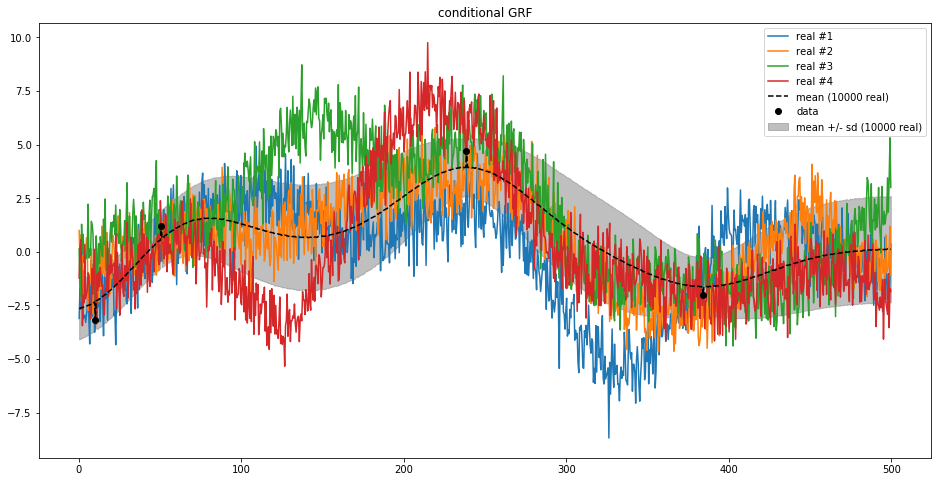

In [15]:
# Plot the first realizations, the mean and the mean +/- standard deviation
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Db[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Db_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.fill_between(xg, sim1Db_mean - sim1Db_std, sim1Db_mean + sim1Db_std, 
                 color='gray', alpha=.5, label='mean +/- sd ({} real)'.format(nreal))
plt.plot(x, v, 'o', c='k', label='data') # add conditioning points
plt.legend()
plt.title('conditional GRF')
plt.show()

### Kriging
Compute (simple) kriging estimates and standard deviation.

In [16]:
krig1Db, krig1Db_std = grf.krige1D(x, v, cov_model, nx, dx, ox)

KRIGE1D: Computing circulant embedding...
KRIGE1D: Embedding dimension: 2048
KRIGE1D: Computing FFT of circulant matrix...
KRIGE1D: Computing covariance matrix (rAA) for conditioning locations...
KRIGE1D: Computing covariance matrix (rBA) for non-conditioning / conditioning locations...
KRIGE1D: Computing rBA * rAA^(-1)...
KRIGE1D: computing kriging estimates...
KRIGE1D: computing kriging standard deviation ...


Plot the first realizations of the previous simulation and the kriging estimates and standard deviation.

In [17]:
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Db[i], label='real #{}'.format(i+1))

plt.plot(xg, krig1Db, c='black', ls='dashed', label='kriging')
plt.fill_between(xg, krig1Db - krig1Db_std, krig1Db + krig1Db_std, 
                 color='gray', alpha=.5, label='krig. est. +/- sd')
plt.plot(x, v, 'o', c='k', label='data') # add conditioning points
plt.legend()
plt.title('conditional GRF')
plt.show()

## Simulations with imposed mean and/or variance
Mean and variance in the simulation grid can be specified, they can be stationary (constant) or non-stationary. 
By default, the mean is set to the mean of data values (or zero if no conditioning data) (constant) and the variance is given by the sill of the variogram model (constant).

### Simulations with constant mean and variance
Set mean to $3.0$ and variance to the double of the covariance model sill.

In [18]:
np.random.seed(123)
sim1Dc = grf.grf1D(cov_model, nx, dx, ox, x=x, v=v, mean=3., var=2*cov_model.sill(), nreal=nreal)
sim1Dc_mean = np.mean(sim1Dc, axis=0)
sim1Dc_std = np.std(sim1Dc, axis=0)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Treatment of conditioning data...
GRF1D: Computing covariance matrix (rAA) for conditioning locations...
GRF1D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF1D: Unconditional simulation    1-   2 of 10000...
GRF1D: Unconditional simulation    3-   4 of 10000...
GRF1D: Unconditional simulation    5-   6 of 10000...
GRF1D: Unconditional simulation    7-   8 of 10000...
GRF1D: Unconditional simulation    9-  10 of 10000...
GRF1D: Unconditional simulation   11-  12 of 10000...
GRF1D: Unconditional simulation   13-  14 of 10000...
GRF1D: Unconditional simulation   15-  16 of 10000...
GRF1D: Unconditional simulation   17-  18 of 10000...
GRF1D: Unconditional simulation   19-  20 of 10000...
GRF1D: Unconditional simulation   21-  22 of 10000...
GRF1D: Unconditional simulation   23-  24 of 1000

GRF1D: Unconditional simulation 1459-1460 of 10000...
GRF1D: Unconditional simulation 1461-1462 of 10000...
GRF1D: Unconditional simulation 1463-1464 of 10000...
GRF1D: Unconditional simulation 1465-1466 of 10000...
GRF1D: Unconditional simulation 1467-1468 of 10000...
GRF1D: Unconditional simulation 1469-1470 of 10000...
GRF1D: Unconditional simulation 1471-1472 of 10000...
GRF1D: Unconditional simulation 1473-1474 of 10000...
GRF1D: Unconditional simulation 1475-1476 of 10000...
GRF1D: Unconditional simulation 1477-1478 of 10000...
GRF1D: Unconditional simulation 1479-1480 of 10000...
GRF1D: Unconditional simulation 1481-1482 of 10000...
GRF1D: Unconditional simulation 1483-1484 of 10000...
GRF1D: Unconditional simulation 1485-1486 of 10000...
GRF1D: Unconditional simulation 1487-1488 of 10000...
GRF1D: Unconditional simulation 1489-1490 of 10000...
GRF1D: Unconditional simulation 1491-1492 of 10000...
GRF1D: Unconditional simulation 1493-1494 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 2969-2970 of 10000...
GRF1D: Unconditional simulation 2971-2972 of 10000...
GRF1D: Unconditional simulation 2973-2974 of 10000...
GRF1D: Unconditional simulation 2975-2976 of 10000...
GRF1D: Unconditional simulation 2977-2978 of 10000...
GRF1D: Unconditional simulation 2979-2980 of 10000...
GRF1D: Unconditional simulation 2981-2982 of 10000...
GRF1D: Unconditional simulation 2983-2984 of 10000...
GRF1D: Unconditional simulation 2985-2986 of 10000...
GRF1D: Unconditional simulation 2987-2988 of 10000...
GRF1D: Unconditional simulation 2989-2990 of 10000...
GRF1D: Unconditional simulation 2991-2992 of 10000...
GRF1D: Unconditional simulation 2993-2994 of 10000...
GRF1D: Unconditional simulation 2995-2996 of 10000...
GRF1D: Unconditional simulation 2997-2998 of 10000...
GRF1D: Unconditional simulation 2999-3000 of 10000...
GRF1D: Unconditional simulation 3001-3002 of 10000...
GRF1D: Unconditional simulation 3003-3004 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 4337-4338 of 10000...
GRF1D: Unconditional simulation 4339-4340 of 10000...
GRF1D: Unconditional simulation 4341-4342 of 10000...
GRF1D: Unconditional simulation 4343-4344 of 10000...
GRF1D: Unconditional simulation 4345-4346 of 10000...
GRF1D: Unconditional simulation 4347-4348 of 10000...
GRF1D: Unconditional simulation 4349-4350 of 10000...
GRF1D: Unconditional simulation 4351-4352 of 10000...
GRF1D: Unconditional simulation 4353-4354 of 10000...
GRF1D: Unconditional simulation 4355-4356 of 10000...
GRF1D: Unconditional simulation 4357-4358 of 10000...
GRF1D: Unconditional simulation 4359-4360 of 10000...
GRF1D: Unconditional simulation 4361-4362 of 10000...
GRF1D: Unconditional simulation 4363-4364 of 10000...
GRF1D: Unconditional simulation 4365-4366 of 10000...
GRF1D: Unconditional simulation 4367-4368 of 10000...
GRF1D: Unconditional simulation 4369-4370 of 10000...
GRF1D: Unconditional simulation 4371-4372 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 5373-5374 of 10000...
GRF1D: Unconditional simulation 5375-5376 of 10000...
GRF1D: Unconditional simulation 5377-5378 of 10000...
GRF1D: Unconditional simulation 5379-5380 of 10000...
GRF1D: Unconditional simulation 5381-5382 of 10000...
GRF1D: Unconditional simulation 5383-5384 of 10000...
GRF1D: Unconditional simulation 5385-5386 of 10000...
GRF1D: Unconditional simulation 5387-5388 of 10000...
GRF1D: Unconditional simulation 5389-5390 of 10000...
GRF1D: Unconditional simulation 5391-5392 of 10000...
GRF1D: Unconditional simulation 5393-5394 of 10000...
GRF1D: Unconditional simulation 5395-5396 of 10000...
GRF1D: Unconditional simulation 5397-5398 of 10000...
GRF1D: Unconditional simulation 5399-5400 of 10000...
GRF1D: Unconditional simulation 5401-5402 of 10000...
GRF1D: Unconditional simulation 5403-5404 of 10000...
GRF1D: Unconditional simulation 5405-5406 of 10000...
GRF1D: Unconditional simulation 5407-5408 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 6459-6460 of 10000...
GRF1D: Unconditional simulation 6461-6462 of 10000...
GRF1D: Unconditional simulation 6463-6464 of 10000...
GRF1D: Unconditional simulation 6465-6466 of 10000...
GRF1D: Unconditional simulation 6467-6468 of 10000...
GRF1D: Unconditional simulation 6469-6470 of 10000...
GRF1D: Unconditional simulation 6471-6472 of 10000...
GRF1D: Unconditional simulation 6473-6474 of 10000...
GRF1D: Unconditional simulation 6475-6476 of 10000...
GRF1D: Unconditional simulation 6477-6478 of 10000...
GRF1D: Unconditional simulation 6479-6480 of 10000...
GRF1D: Unconditional simulation 6481-6482 of 10000...
GRF1D: Unconditional simulation 6483-6484 of 10000...
GRF1D: Unconditional simulation 6485-6486 of 10000...
GRF1D: Unconditional simulation 6487-6488 of 10000...
GRF1D: Unconditional simulation 6489-6490 of 10000...
GRF1D: Unconditional simulation 6491-6492 of 10000...
GRF1D: Unconditional simulation 6493-6494 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 7633-7634 of 10000...
GRF1D: Unconditional simulation 7635-7636 of 10000...
GRF1D: Unconditional simulation 7637-7638 of 10000...
GRF1D: Unconditional simulation 7639-7640 of 10000...
GRF1D: Unconditional simulation 7641-7642 of 10000...
GRF1D: Unconditional simulation 7643-7644 of 10000...
GRF1D: Unconditional simulation 7645-7646 of 10000...
GRF1D: Unconditional simulation 7647-7648 of 10000...
GRF1D: Unconditional simulation 7649-7650 of 10000...
GRF1D: Unconditional simulation 7651-7652 of 10000...
GRF1D: Unconditional simulation 7653-7654 of 10000...
GRF1D: Unconditional simulation 7655-7656 of 10000...
GRF1D: Unconditional simulation 7657-7658 of 10000...
GRF1D: Unconditional simulation 7659-7660 of 10000...
GRF1D: Unconditional simulation 7661-7662 of 10000...
GRF1D: Unconditional simulation 7663-7664 of 10000...
GRF1D: Unconditional simulation 7665-7666 of 10000...
GRF1D: Unconditional simulation 7667-7668 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 9017-9018 of 10000...
GRF1D: Unconditional simulation 9019-9020 of 10000...
GRF1D: Unconditional simulation 9021-9022 of 10000...
GRF1D: Unconditional simulation 9023-9024 of 10000...
GRF1D: Unconditional simulation 9025-9026 of 10000...
GRF1D: Unconditional simulation 9027-9028 of 10000...
GRF1D: Unconditional simulation 9029-9030 of 10000...
GRF1D: Unconditional simulation 9031-9032 of 10000...
GRF1D: Unconditional simulation 9033-9034 of 10000...
GRF1D: Unconditional simulation 9035-9036 of 10000...
GRF1D: Unconditional simulation 9037-9038 of 10000...
GRF1D: Unconditional simulation 9039-9040 of 10000...
GRF1D: Unconditional simulation 9041-9042 of 10000...
GRF1D: Unconditional simulation 9043-9044 of 10000...
GRF1D: Unconditional simulation 9045-9046 of 10000...
GRF1D: Unconditional simulation 9047-9048 of 10000...
GRF1D: Unconditional simulation 9049-9050 of 10000...
GRF1D: Unconditional simulation 9051-9052 of 10000...
GRF1D: Unconditional simulat

GRF1D: Updating conditional simulation    1 of 10000...
GRF1D: Updating conditional simulation    2 of 10000...
GRF1D: Updating conditional simulation    3 of 10000...
GRF1D: Updating conditional simulation    4 of 10000...
GRF1D: Updating conditional simulation    5 of 10000...
GRF1D: Updating conditional simulation    6 of 10000...
GRF1D: Updating conditional simulation    7 of 10000...
GRF1D: Updating conditional simulation    8 of 10000...
GRF1D: Updating conditional simulation    9 of 10000...
GRF1D: Updating conditional simulation   10 of 10000...
GRF1D: Updating conditional simulation   11 of 10000...
GRF1D: Updating conditional simulation   12 of 10000...
GRF1D: Updating conditional simulation   13 of 10000...
GRF1D: Updating conditional simulation   14 of 10000...
GRF1D: Updating conditional simulation   15 of 10000...
GRF1D: Updating conditional simulation   16 of 10000...
GRF1D: Updating conditional simulation   17 of 10000...
GRF1D: Updating conditional simulation   18 of 1

GRF1D: Updating conditional simulation  598 of 10000...
GRF1D: Updating conditional simulation  599 of 10000...
GRF1D: Updating conditional simulation  600 of 10000...
GRF1D: Updating conditional simulation  601 of 10000...
GRF1D: Updating conditional simulation  602 of 10000...
GRF1D: Updating conditional simulation  603 of 10000...
GRF1D: Updating conditional simulation  604 of 10000...
GRF1D: Updating conditional simulation  605 of 10000...
GRF1D: Updating conditional simulation  606 of 10000...
GRF1D: Updating conditional simulation  607 of 10000...
GRF1D: Updating conditional simulation  608 of 10000...
GRF1D: Updating conditional simulation  609 of 10000...
GRF1D: Updating conditional simulation  610 of 10000...
GRF1D: Updating conditional simulation  611 of 10000...
GRF1D: Updating conditional simulation  612 of 10000...
GRF1D: Updating conditional simulation  613 of 10000...
GRF1D: Updating conditional simulation  614 of 10000...
GRF1D: Updating conditional simulation  615 of 1

GRF1D: Updating conditional simulation 1131 of 10000...
GRF1D: Updating conditional simulation 1132 of 10000...
GRF1D: Updating conditional simulation 1133 of 10000...
GRF1D: Updating conditional simulation 1134 of 10000...
GRF1D: Updating conditional simulation 1135 of 10000...
GRF1D: Updating conditional simulation 1136 of 10000...
GRF1D: Updating conditional simulation 1137 of 10000...
GRF1D: Updating conditional simulation 1138 of 10000...
GRF1D: Updating conditional simulation 1139 of 10000...
GRF1D: Updating conditional simulation 1140 of 10000...
GRF1D: Updating conditional simulation 1141 of 10000...
GRF1D: Updating conditional simulation 1142 of 10000...
GRF1D: Updating conditional simulation 1143 of 10000...
GRF1D: Updating conditional simulation 1144 of 10000...
GRF1D: Updating conditional simulation 1145 of 10000...
GRF1D: Updating conditional simulation 1146 of 10000...
GRF1D: Updating conditional simulation 1147 of 10000...
GRF1D: Updating conditional simulation 1148 of 1

GRF1D: Updating conditional simulation 1739 of 10000...
GRF1D: Updating conditional simulation 1740 of 10000...
GRF1D: Updating conditional simulation 1741 of 10000...
GRF1D: Updating conditional simulation 1742 of 10000...
GRF1D: Updating conditional simulation 1743 of 10000...
GRF1D: Updating conditional simulation 1744 of 10000...
GRF1D: Updating conditional simulation 1745 of 10000...
GRF1D: Updating conditional simulation 1746 of 10000...
GRF1D: Updating conditional simulation 1747 of 10000...
GRF1D: Updating conditional simulation 1748 of 10000...
GRF1D: Updating conditional simulation 1749 of 10000...
GRF1D: Updating conditional simulation 1750 of 10000...
GRF1D: Updating conditional simulation 1751 of 10000...
GRF1D: Updating conditional simulation 1752 of 10000...
GRF1D: Updating conditional simulation 1753 of 10000...
GRF1D: Updating conditional simulation 1754 of 10000...
GRF1D: Updating conditional simulation 1755 of 10000...
GRF1D: Updating conditional simulation 1756 of 1

GRF1D: Updating conditional simulation 2436 of 10000...
GRF1D: Updating conditional simulation 2437 of 10000...
GRF1D: Updating conditional simulation 2438 of 10000...
GRF1D: Updating conditional simulation 2439 of 10000...
GRF1D: Updating conditional simulation 2440 of 10000...
GRF1D: Updating conditional simulation 2441 of 10000...
GRF1D: Updating conditional simulation 2442 of 10000...
GRF1D: Updating conditional simulation 2443 of 10000...
GRF1D: Updating conditional simulation 2444 of 10000...
GRF1D: Updating conditional simulation 2445 of 10000...
GRF1D: Updating conditional simulation 2446 of 10000...
GRF1D: Updating conditional simulation 2447 of 10000...
GRF1D: Updating conditional simulation 2448 of 10000...
GRF1D: Updating conditional simulation 2449 of 10000...
GRF1D: Updating conditional simulation 2450 of 10000...
GRF1D: Updating conditional simulation 2451 of 10000...
GRF1D: Updating conditional simulation 2452 of 10000...
GRF1D: Updating conditional simulation 2453 of 1

GRF1D: Updating conditional simulation 3214 of 10000...
GRF1D: Updating conditional simulation 3215 of 10000...
GRF1D: Updating conditional simulation 3216 of 10000...
GRF1D: Updating conditional simulation 3217 of 10000...
GRF1D: Updating conditional simulation 3218 of 10000...
GRF1D: Updating conditional simulation 3219 of 10000...
GRF1D: Updating conditional simulation 3220 of 10000...
GRF1D: Updating conditional simulation 3221 of 10000...
GRF1D: Updating conditional simulation 3222 of 10000...
GRF1D: Updating conditional simulation 3223 of 10000...
GRF1D: Updating conditional simulation 3224 of 10000...
GRF1D: Updating conditional simulation 3225 of 10000...
GRF1D: Updating conditional simulation 3226 of 10000...
GRF1D: Updating conditional simulation 3227 of 10000...
GRF1D: Updating conditional simulation 3228 of 10000...
GRF1D: Updating conditional simulation 3229 of 10000...
GRF1D: Updating conditional simulation 3230 of 10000...
GRF1D: Updating conditional simulation 3231 of 1

GRF1D: Updating conditional simulation 4024 of 10000...
GRF1D: Updating conditional simulation 4025 of 10000...
GRF1D: Updating conditional simulation 4026 of 10000...
GRF1D: Updating conditional simulation 4027 of 10000...
GRF1D: Updating conditional simulation 4028 of 10000...
GRF1D: Updating conditional simulation 4029 of 10000...
GRF1D: Updating conditional simulation 4030 of 10000...
GRF1D: Updating conditional simulation 4031 of 10000...
GRF1D: Updating conditional simulation 4032 of 10000...
GRF1D: Updating conditional simulation 4033 of 10000...
GRF1D: Updating conditional simulation 4034 of 10000...
GRF1D: Updating conditional simulation 4035 of 10000...
GRF1D: Updating conditional simulation 4036 of 10000...
GRF1D: Updating conditional simulation 4037 of 10000...
GRF1D: Updating conditional simulation 4038 of 10000...
GRF1D: Updating conditional simulation 4039 of 10000...
GRF1D: Updating conditional simulation 4040 of 10000...
GRF1D: Updating conditional simulation 4041 of 1

GRF1D: Updating conditional simulation 4821 of 10000...
GRF1D: Updating conditional simulation 4822 of 10000...
GRF1D: Updating conditional simulation 4823 of 10000...
GRF1D: Updating conditional simulation 4824 of 10000...
GRF1D: Updating conditional simulation 4825 of 10000...
GRF1D: Updating conditional simulation 4826 of 10000...
GRF1D: Updating conditional simulation 4827 of 10000...
GRF1D: Updating conditional simulation 4828 of 10000...
GRF1D: Updating conditional simulation 4829 of 10000...
GRF1D: Updating conditional simulation 4830 of 10000...
GRF1D: Updating conditional simulation 4831 of 10000...
GRF1D: Updating conditional simulation 4832 of 10000...
GRF1D: Updating conditional simulation 4833 of 10000...
GRF1D: Updating conditional simulation 4834 of 10000...
GRF1D: Updating conditional simulation 4835 of 10000...
GRF1D: Updating conditional simulation 4836 of 10000...
GRF1D: Updating conditional simulation 4837 of 10000...
GRF1D: Updating conditional simulation 4838 of 1

GRF1D: Updating conditional simulation 5772 of 10000...
GRF1D: Updating conditional simulation 5773 of 10000...
GRF1D: Updating conditional simulation 5774 of 10000...
GRF1D: Updating conditional simulation 5775 of 10000...
GRF1D: Updating conditional simulation 5776 of 10000...
GRF1D: Updating conditional simulation 5777 of 10000...
GRF1D: Updating conditional simulation 5778 of 10000...
GRF1D: Updating conditional simulation 5779 of 10000...
GRF1D: Updating conditional simulation 5780 of 10000...
GRF1D: Updating conditional simulation 5781 of 10000...
GRF1D: Updating conditional simulation 5782 of 10000...
GRF1D: Updating conditional simulation 5783 of 10000...
GRF1D: Updating conditional simulation 5784 of 10000...
GRF1D: Updating conditional simulation 5785 of 10000...
GRF1D: Updating conditional simulation 5786 of 10000...
GRF1D: Updating conditional simulation 5787 of 10000...
GRF1D: Updating conditional simulation 5788 of 10000...
GRF1D: Updating conditional simulation 5789 of 1

GRF1D: Updating conditional simulation 6526 of 10000...
GRF1D: Updating conditional simulation 6527 of 10000...
GRF1D: Updating conditional simulation 6528 of 10000...
GRF1D: Updating conditional simulation 6529 of 10000...
GRF1D: Updating conditional simulation 6530 of 10000...
GRF1D: Updating conditional simulation 6531 of 10000...
GRF1D: Updating conditional simulation 6532 of 10000...
GRF1D: Updating conditional simulation 6533 of 10000...
GRF1D: Updating conditional simulation 6534 of 10000...
GRF1D: Updating conditional simulation 6535 of 10000...
GRF1D: Updating conditional simulation 6536 of 10000...
GRF1D: Updating conditional simulation 6537 of 10000...
GRF1D: Updating conditional simulation 6538 of 10000...
GRF1D: Updating conditional simulation 6539 of 10000...
GRF1D: Updating conditional simulation 6540 of 10000...
GRF1D: Updating conditional simulation 6541 of 10000...
GRF1D: Updating conditional simulation 6542 of 10000...
GRF1D: Updating conditional simulation 6543 of 1

GRF1D: Updating conditional simulation 7317 of 10000...
GRF1D: Updating conditional simulation 7318 of 10000...
GRF1D: Updating conditional simulation 7319 of 10000...
GRF1D: Updating conditional simulation 7320 of 10000...
GRF1D: Updating conditional simulation 7321 of 10000...
GRF1D: Updating conditional simulation 7322 of 10000...
GRF1D: Updating conditional simulation 7323 of 10000...
GRF1D: Updating conditional simulation 7324 of 10000...
GRF1D: Updating conditional simulation 7325 of 10000...
GRF1D: Updating conditional simulation 7326 of 10000...
GRF1D: Updating conditional simulation 7327 of 10000...
GRF1D: Updating conditional simulation 7328 of 10000...
GRF1D: Updating conditional simulation 7329 of 10000...
GRF1D: Updating conditional simulation 7330 of 10000...
GRF1D: Updating conditional simulation 7331 of 10000...
GRF1D: Updating conditional simulation 7332 of 10000...
GRF1D: Updating conditional simulation 7333 of 10000...
GRF1D: Updating conditional simulation 7334 of 1

GRF1D: Updating conditional simulation 8131 of 10000...
GRF1D: Updating conditional simulation 8132 of 10000...
GRF1D: Updating conditional simulation 8133 of 10000...
GRF1D: Updating conditional simulation 8134 of 10000...
GRF1D: Updating conditional simulation 8135 of 10000...
GRF1D: Updating conditional simulation 8136 of 10000...
GRF1D: Updating conditional simulation 8137 of 10000...
GRF1D: Updating conditional simulation 8138 of 10000...
GRF1D: Updating conditional simulation 8139 of 10000...
GRF1D: Updating conditional simulation 8140 of 10000...
GRF1D: Updating conditional simulation 8141 of 10000...
GRF1D: Updating conditional simulation 8142 of 10000...
GRF1D: Updating conditional simulation 8143 of 10000...
GRF1D: Updating conditional simulation 8144 of 10000...
GRF1D: Updating conditional simulation 8145 of 10000...
GRF1D: Updating conditional simulation 8146 of 10000...
GRF1D: Updating conditional simulation 8147 of 10000...
GRF1D: Updating conditional simulation 8148 of 1

GRF1D: Updating conditional simulation 8829 of 10000...
GRF1D: Updating conditional simulation 8830 of 10000...
GRF1D: Updating conditional simulation 8831 of 10000...
GRF1D: Updating conditional simulation 8832 of 10000...
GRF1D: Updating conditional simulation 8833 of 10000...
GRF1D: Updating conditional simulation 8834 of 10000...
GRF1D: Updating conditional simulation 8835 of 10000...
GRF1D: Updating conditional simulation 8836 of 10000...
GRF1D: Updating conditional simulation 8837 of 10000...
GRF1D: Updating conditional simulation 8838 of 10000...
GRF1D: Updating conditional simulation 8839 of 10000...
GRF1D: Updating conditional simulation 8840 of 10000...
GRF1D: Updating conditional simulation 8841 of 10000...
GRF1D: Updating conditional simulation 8842 of 10000...
GRF1D: Updating conditional simulation 8843 of 10000...
GRF1D: Updating conditional simulation 8844 of 10000...
GRF1D: Updating conditional simulation 8845 of 10000...
GRF1D: Updating conditional simulation 8846 of 1

GRF1D: Updating conditional simulation 9724 of 10000...
GRF1D: Updating conditional simulation 9725 of 10000...
GRF1D: Updating conditional simulation 9726 of 10000...
GRF1D: Updating conditional simulation 9727 of 10000...
GRF1D: Updating conditional simulation 9728 of 10000...
GRF1D: Updating conditional simulation 9729 of 10000...
GRF1D: Updating conditional simulation 9730 of 10000...
GRF1D: Updating conditional simulation 9731 of 10000...
GRF1D: Updating conditional simulation 9732 of 10000...
GRF1D: Updating conditional simulation 9733 of 10000...
GRF1D: Updating conditional simulation 9734 of 10000...
GRF1D: Updating conditional simulation 9735 of 10000...
GRF1D: Updating conditional simulation 9736 of 10000...
GRF1D: Updating conditional simulation 9737 of 10000...
GRF1D: Updating conditional simulation 9738 of 10000...
GRF1D: Updating conditional simulation 9739 of 10000...
GRF1D: Updating conditional simulation 9740 of 10000...
GRF1D: Updating conditional simulation 9741 of 1

In [19]:
# Plot the first realizations, the mean and the mean +/- standard deviation
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Dc[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Dc_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.fill_between(xg, sim1Dc_mean - sim1Dc_std, sim1Dc_mean + sim1Dc_std, 
                 color='gray', alpha=.5, label='mean +/- sd ({} real)'.format(nreal))
plt.plot(x, v, 'o', c='k', label='data') # add conditioning points
plt.legend()
plt.title('conditional GRF - stationary mean and var')
plt.show()

In [20]:
krig1Dc, krig1Dc_std = grf.krige1D(x, v, cov_model, nx, dx, ox, mean=3., var=2*cov_model.sill())

KRIGE1D: Computing circulant embedding...
KRIGE1D: Embedding dimension: 2048
KRIGE1D: Computing FFT of circulant matrix...
KRIGE1D: Computing covariance matrix (rAA) for conditioning locations...
KRIGE1D: Computing covariance matrix (rBA) for non-conditioning / conditioning locations...
KRIGE1D: Computing rBA * rAA^(-1)...
KRIGE1D: computing kriging estimates...
KRIGE1D: computing kriging standard deviation ...


In [21]:
# Plot the first realizations of the previous simulation and the result of kriging.
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Dc[i], label='real #{}'.format(i+1))

plt.plot(xg, krig1Dc, c='black', ls='dashed', label='kriging')
plt.fill_between(xg, krig1Dc - krig1Dc_std, krig1Dc + krig1Dc_std, 
                 color='gray', alpha=.5, label='krig. est. +/- sd')
plt.plot(x, v, 'o', c='k', label='data') # add conditioning points
plt.legend()
plt.title('conditional GRF - stationary mean and var')
plt.show()

### Simulations with non-stationary mean and variance
Set the mean varying linearly from $-10.0$ (at the left border) to $+10.0$ (at the right border), and the variance
from $0.1$ to $4.0$.

In [22]:
# Set mean and variance
mean = np.linspace(-10, 10, nx)
var = np.linspace(0.1, 4, nx)*w

# Simulation
np.random.seed(123)
sim1Dd = grf.grf1D(cov_model, nx, dx, ox, x=x, v=v, mean=mean, var=var, nreal=nreal)
sim1Dd_mean = np.mean(sim1Dd, axis=0)
sim1Dd_std = np.std(sim1Dd, axis=0)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Treatment of conditioning data...
GRF1D: Computing covariance matrix (rAA) for conditioning locations...
GRF1D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF1D: Unconditional simulation    1-   2 of 10000...
GRF1D: Unconditional simulation    3-   4 of 10000...
GRF1D: Unconditional simulation    5-   6 of 10000...
GRF1D: Unconditional simulation    7-   8 of 10000...
GRF1D: Unconditional simulation    9-  10 of 10000...
GRF1D: Unconditional simulation   11-  12 of 10000...
GRF1D: Unconditional simulation   13-  14 of 10000...
GRF1D: Unconditional simulation   15-  16 of 10000...
GRF1D: Unconditional simulation   17-  18 of 10000...
GRF1D: Unconditional simulation   19-  20 of 10000...
GRF1D: Unconditional simulation   21-  22 of 10000...
GRF1D: Unconditional simulation   23-  24 of 1000

GRF1D: Unconditional simulation 1321-1322 of 10000...
GRF1D: Unconditional simulation 1323-1324 of 10000...
GRF1D: Unconditional simulation 1325-1326 of 10000...
GRF1D: Unconditional simulation 1327-1328 of 10000...
GRF1D: Unconditional simulation 1329-1330 of 10000...
GRF1D: Unconditional simulation 1331-1332 of 10000...
GRF1D: Unconditional simulation 1333-1334 of 10000...
GRF1D: Unconditional simulation 1335-1336 of 10000...
GRF1D: Unconditional simulation 1337-1338 of 10000...
GRF1D: Unconditional simulation 1339-1340 of 10000...
GRF1D: Unconditional simulation 1341-1342 of 10000...
GRF1D: Unconditional simulation 1343-1344 of 10000...
GRF1D: Unconditional simulation 1345-1346 of 10000...
GRF1D: Unconditional simulation 1347-1348 of 10000...
GRF1D: Unconditional simulation 1349-1350 of 10000...
GRF1D: Unconditional simulation 1351-1352 of 10000...
GRF1D: Unconditional simulation 1353-1354 of 10000...
GRF1D: Unconditional simulation 1355-1356 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 2215-2216 of 10000...
GRF1D: Unconditional simulation 2217-2218 of 10000...
GRF1D: Unconditional simulation 2219-2220 of 10000...
GRF1D: Unconditional simulation 2221-2222 of 10000...
GRF1D: Unconditional simulation 2223-2224 of 10000...
GRF1D: Unconditional simulation 2225-2226 of 10000...
GRF1D: Unconditional simulation 2227-2228 of 10000...
GRF1D: Unconditional simulation 2229-2230 of 10000...
GRF1D: Unconditional simulation 2231-2232 of 10000...
GRF1D: Unconditional simulation 2233-2234 of 10000...
GRF1D: Unconditional simulation 2235-2236 of 10000...
GRF1D: Unconditional simulation 2237-2238 of 10000...
GRF1D: Unconditional simulation 2239-2240 of 10000...
GRF1D: Unconditional simulation 2241-2242 of 10000...
GRF1D: Unconditional simulation 2243-2244 of 10000...
GRF1D: Unconditional simulation 2245-2246 of 10000...
GRF1D: Unconditional simulation 2247-2248 of 10000...
GRF1D: Unconditional simulation 2249-2250 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 3421-3422 of 10000...
GRF1D: Unconditional simulation 3423-3424 of 10000...
GRF1D: Unconditional simulation 3425-3426 of 10000...
GRF1D: Unconditional simulation 3427-3428 of 10000...
GRF1D: Unconditional simulation 3429-3430 of 10000...
GRF1D: Unconditional simulation 3431-3432 of 10000...
GRF1D: Unconditional simulation 3433-3434 of 10000...
GRF1D: Unconditional simulation 3435-3436 of 10000...
GRF1D: Unconditional simulation 3437-3438 of 10000...
GRF1D: Unconditional simulation 3439-3440 of 10000...
GRF1D: Unconditional simulation 3441-3442 of 10000...
GRF1D: Unconditional simulation 3443-3444 of 10000...
GRF1D: Unconditional simulation 3445-3446 of 10000...
GRF1D: Unconditional simulation 3447-3448 of 10000...
GRF1D: Unconditional simulation 3449-3450 of 10000...
GRF1D: Unconditional simulation 3451-3452 of 10000...
GRF1D: Unconditional simulation 3453-3454 of 10000...
GRF1D: Unconditional simulation 3455-3456 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 4563-4564 of 10000...
GRF1D: Unconditional simulation 4565-4566 of 10000...
GRF1D: Unconditional simulation 4567-4568 of 10000...
GRF1D: Unconditional simulation 4569-4570 of 10000...
GRF1D: Unconditional simulation 4571-4572 of 10000...
GRF1D: Unconditional simulation 4573-4574 of 10000...
GRF1D: Unconditional simulation 4575-4576 of 10000...
GRF1D: Unconditional simulation 4577-4578 of 10000...
GRF1D: Unconditional simulation 4579-4580 of 10000...
GRF1D: Unconditional simulation 4581-4582 of 10000...
GRF1D: Unconditional simulation 4583-4584 of 10000...
GRF1D: Unconditional simulation 4585-4586 of 10000...
GRF1D: Unconditional simulation 4587-4588 of 10000...
GRF1D: Unconditional simulation 4589-4590 of 10000...
GRF1D: Unconditional simulation 4591-4592 of 10000...
GRF1D: Unconditional simulation 4593-4594 of 10000...
GRF1D: Unconditional simulation 4595-4596 of 10000...
GRF1D: Unconditional simulation 4597-4598 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 5661-5662 of 10000...
GRF1D: Unconditional simulation 5663-5664 of 10000...
GRF1D: Unconditional simulation 5665-5666 of 10000...
GRF1D: Unconditional simulation 5667-5668 of 10000...
GRF1D: Unconditional simulation 5669-5670 of 10000...
GRF1D: Unconditional simulation 5671-5672 of 10000...
GRF1D: Unconditional simulation 5673-5674 of 10000...
GRF1D: Unconditional simulation 5675-5676 of 10000...
GRF1D: Unconditional simulation 5677-5678 of 10000...
GRF1D: Unconditional simulation 5679-5680 of 10000...
GRF1D: Unconditional simulation 5681-5682 of 10000...
GRF1D: Unconditional simulation 5683-5684 of 10000...
GRF1D: Unconditional simulation 5685-5686 of 10000...
GRF1D: Unconditional simulation 5687-5688 of 10000...
GRF1D: Unconditional simulation 5689-5690 of 10000...
GRF1D: Unconditional simulation 5691-5692 of 10000...
GRF1D: Unconditional simulation 5693-5694 of 10000...
GRF1D: Unconditional simulation 5695-5696 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 6891-6892 of 10000...
GRF1D: Unconditional simulation 6893-6894 of 10000...
GRF1D: Unconditional simulation 6895-6896 of 10000...
GRF1D: Unconditional simulation 6897-6898 of 10000...
GRF1D: Unconditional simulation 6899-6900 of 10000...
GRF1D: Unconditional simulation 6901-6902 of 10000...
GRF1D: Unconditional simulation 6903-6904 of 10000...
GRF1D: Unconditional simulation 6905-6906 of 10000...
GRF1D: Unconditional simulation 6907-6908 of 10000...
GRF1D: Unconditional simulation 6909-6910 of 10000...
GRF1D: Unconditional simulation 6911-6912 of 10000...
GRF1D: Unconditional simulation 6913-6914 of 10000...
GRF1D: Unconditional simulation 6915-6916 of 10000...
GRF1D: Unconditional simulation 6917-6918 of 10000...
GRF1D: Unconditional simulation 6919-6920 of 10000...
GRF1D: Unconditional simulation 6921-6922 of 10000...
GRF1D: Unconditional simulation 6923-6924 of 10000...
GRF1D: Unconditional simulation 6925-6926 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 8015-8016 of 10000...
GRF1D: Unconditional simulation 8017-8018 of 10000...
GRF1D: Unconditional simulation 8019-8020 of 10000...
GRF1D: Unconditional simulation 8021-8022 of 10000...
GRF1D: Unconditional simulation 8023-8024 of 10000...
GRF1D: Unconditional simulation 8025-8026 of 10000...
GRF1D: Unconditional simulation 8027-8028 of 10000...
GRF1D: Unconditional simulation 8029-8030 of 10000...
GRF1D: Unconditional simulation 8031-8032 of 10000...
GRF1D: Unconditional simulation 8033-8034 of 10000...
GRF1D: Unconditional simulation 8035-8036 of 10000...
GRF1D: Unconditional simulation 8037-8038 of 10000...
GRF1D: Unconditional simulation 8039-8040 of 10000...
GRF1D: Unconditional simulation 8041-8042 of 10000...
GRF1D: Unconditional simulation 8043-8044 of 10000...
GRF1D: Unconditional simulation 8045-8046 of 10000...
GRF1D: Unconditional simulation 8047-8048 of 10000...
GRF1D: Unconditional simulation 8049-8050 of 10000...
GRF1D: Unconditional simulat

GRF1D: Unconditional simulation 9249-9250 of 10000...
GRF1D: Unconditional simulation 9251-9252 of 10000...
GRF1D: Unconditional simulation 9253-9254 of 10000...
GRF1D: Unconditional simulation 9255-9256 of 10000...
GRF1D: Unconditional simulation 9257-9258 of 10000...
GRF1D: Unconditional simulation 9259-9260 of 10000...
GRF1D: Unconditional simulation 9261-9262 of 10000...
GRF1D: Unconditional simulation 9263-9264 of 10000...
GRF1D: Unconditional simulation 9265-9266 of 10000...
GRF1D: Unconditional simulation 9267-9268 of 10000...
GRF1D: Unconditional simulation 9269-9270 of 10000...
GRF1D: Unconditional simulation 9271-9272 of 10000...
GRF1D: Unconditional simulation 9273-9274 of 10000...
GRF1D: Unconditional simulation 9275-9276 of 10000...
GRF1D: Unconditional simulation 9277-9278 of 10000...
GRF1D: Unconditional simulation 9279-9280 of 10000...
GRF1D: Unconditional simulation 9281-9282 of 10000...
GRF1D: Unconditional simulation 9283-9284 of 10000...
GRF1D: Unconditional simulat

GRF1D: Updating conditional simulation   42 of 10000...
GRF1D: Updating conditional simulation   43 of 10000...
GRF1D: Updating conditional simulation   44 of 10000...
GRF1D: Updating conditional simulation   45 of 10000...
GRF1D: Updating conditional simulation   46 of 10000...
GRF1D: Updating conditional simulation   47 of 10000...
GRF1D: Updating conditional simulation   48 of 10000...
GRF1D: Updating conditional simulation   49 of 10000...
GRF1D: Updating conditional simulation   50 of 10000...
GRF1D: Updating conditional simulation   51 of 10000...
GRF1D: Updating conditional simulation   52 of 10000...
GRF1D: Updating conditional simulation   53 of 10000...
GRF1D: Updating conditional simulation   54 of 10000...
GRF1D: Updating conditional simulation   55 of 10000...
GRF1D: Updating conditional simulation   56 of 10000...
GRF1D: Updating conditional simulation   57 of 10000...
GRF1D: Updating conditional simulation   58 of 10000...
GRF1D: Updating conditional simulation   59 of 1

GRF1D: Updating conditional simulation  756 of 10000...
GRF1D: Updating conditional simulation  757 of 10000...
GRF1D: Updating conditional simulation  758 of 10000...
GRF1D: Updating conditional simulation  759 of 10000...
GRF1D: Updating conditional simulation  760 of 10000...
GRF1D: Updating conditional simulation  761 of 10000...
GRF1D: Updating conditional simulation  762 of 10000...
GRF1D: Updating conditional simulation  763 of 10000...
GRF1D: Updating conditional simulation  764 of 10000...
GRF1D: Updating conditional simulation  765 of 10000...
GRF1D: Updating conditional simulation  766 of 10000...
GRF1D: Updating conditional simulation  767 of 10000...
GRF1D: Updating conditional simulation  768 of 10000...
GRF1D: Updating conditional simulation  769 of 10000...
GRF1D: Updating conditional simulation  770 of 10000...
GRF1D: Updating conditional simulation  771 of 10000...
GRF1D: Updating conditional simulation  772 of 10000...
GRF1D: Updating conditional simulation  773 of 1

GRF1D: Updating conditional simulation 1272 of 10000...
GRF1D: Updating conditional simulation 1273 of 10000...
GRF1D: Updating conditional simulation 1274 of 10000...
GRF1D: Updating conditional simulation 1275 of 10000...
GRF1D: Updating conditional simulation 1276 of 10000...
GRF1D: Updating conditional simulation 1277 of 10000...
GRF1D: Updating conditional simulation 1278 of 10000...
GRF1D: Updating conditional simulation 1279 of 10000...
GRF1D: Updating conditional simulation 1280 of 10000...
GRF1D: Updating conditional simulation 1281 of 10000...
GRF1D: Updating conditional simulation 1282 of 10000...
GRF1D: Updating conditional simulation 1283 of 10000...
GRF1D: Updating conditional simulation 1284 of 10000...
GRF1D: Updating conditional simulation 1285 of 10000...
GRF1D: Updating conditional simulation 1286 of 10000...
GRF1D: Updating conditional simulation 1287 of 10000...
GRF1D: Updating conditional simulation 1288 of 10000...
GRF1D: Updating conditional simulation 1289 of 1

GRF1D: Updating conditional simulation 1825 of 10000...
GRF1D: Updating conditional simulation 1826 of 10000...
GRF1D: Updating conditional simulation 1827 of 10000...
GRF1D: Updating conditional simulation 1828 of 10000...
GRF1D: Updating conditional simulation 1829 of 10000...
GRF1D: Updating conditional simulation 1830 of 10000...
GRF1D: Updating conditional simulation 1831 of 10000...
GRF1D: Updating conditional simulation 1832 of 10000...
GRF1D: Updating conditional simulation 1833 of 10000...
GRF1D: Updating conditional simulation 1834 of 10000...
GRF1D: Updating conditional simulation 1835 of 10000...
GRF1D: Updating conditional simulation 1836 of 10000...
GRF1D: Updating conditional simulation 1837 of 10000...
GRF1D: Updating conditional simulation 1838 of 10000...
GRF1D: Updating conditional simulation 1839 of 10000...
GRF1D: Updating conditional simulation 1840 of 10000...
GRF1D: Updating conditional simulation 1841 of 10000...
GRF1D: Updating conditional simulation 1842 of 1

GRF1D: Updating conditional simulation 2448 of 10000...
GRF1D: Updating conditional simulation 2449 of 10000...
GRF1D: Updating conditional simulation 2450 of 10000...
GRF1D: Updating conditional simulation 2451 of 10000...
GRF1D: Updating conditional simulation 2452 of 10000...
GRF1D: Updating conditional simulation 2453 of 10000...
GRF1D: Updating conditional simulation 2454 of 10000...
GRF1D: Updating conditional simulation 2455 of 10000...
GRF1D: Updating conditional simulation 2456 of 10000...
GRF1D: Updating conditional simulation 2457 of 10000...
GRF1D: Updating conditional simulation 2458 of 10000...
GRF1D: Updating conditional simulation 2459 of 10000...
GRF1D: Updating conditional simulation 2460 of 10000...
GRF1D: Updating conditional simulation 2461 of 10000...
GRF1D: Updating conditional simulation 2462 of 10000...
GRF1D: Updating conditional simulation 2463 of 10000...
GRF1D: Updating conditional simulation 2464 of 10000...
GRF1D: Updating conditional simulation 2465 of 1

GRF1D: Updating conditional simulation 3070 of 10000...
GRF1D: Updating conditional simulation 3071 of 10000...
GRF1D: Updating conditional simulation 3072 of 10000...
GRF1D: Updating conditional simulation 3073 of 10000...
GRF1D: Updating conditional simulation 3074 of 10000...
GRF1D: Updating conditional simulation 3075 of 10000...
GRF1D: Updating conditional simulation 3076 of 10000...
GRF1D: Updating conditional simulation 3077 of 10000...
GRF1D: Updating conditional simulation 3078 of 10000...
GRF1D: Updating conditional simulation 3079 of 10000...
GRF1D: Updating conditional simulation 3080 of 10000...
GRF1D: Updating conditional simulation 3081 of 10000...
GRF1D: Updating conditional simulation 3082 of 10000...
GRF1D: Updating conditional simulation 3083 of 10000...
GRF1D: Updating conditional simulation 3084 of 10000...
GRF1D: Updating conditional simulation 3085 of 10000...
GRF1D: Updating conditional simulation 3086 of 10000...
GRF1D: Updating conditional simulation 3087 of 1

GRF1D: Updating conditional simulation 3742 of 10000...
GRF1D: Updating conditional simulation 3743 of 10000...
GRF1D: Updating conditional simulation 3744 of 10000...
GRF1D: Updating conditional simulation 3745 of 10000...
GRF1D: Updating conditional simulation 3746 of 10000...
GRF1D: Updating conditional simulation 3747 of 10000...
GRF1D: Updating conditional simulation 3748 of 10000...
GRF1D: Updating conditional simulation 3749 of 10000...
GRF1D: Updating conditional simulation 3750 of 10000...
GRF1D: Updating conditional simulation 3751 of 10000...
GRF1D: Updating conditional simulation 3752 of 10000...
GRF1D: Updating conditional simulation 3753 of 10000...
GRF1D: Updating conditional simulation 3754 of 10000...
GRF1D: Updating conditional simulation 3755 of 10000...
GRF1D: Updating conditional simulation 3756 of 10000...
GRF1D: Updating conditional simulation 3757 of 10000...
GRF1D: Updating conditional simulation 3758 of 10000...
GRF1D: Updating conditional simulation 3759 of 1

GRF1D: Updating conditional simulation 4389 of 10000...
GRF1D: Updating conditional simulation 4390 of 10000...
GRF1D: Updating conditional simulation 4391 of 10000...
GRF1D: Updating conditional simulation 4392 of 10000...
GRF1D: Updating conditional simulation 4393 of 10000...
GRF1D: Updating conditional simulation 4394 of 10000...
GRF1D: Updating conditional simulation 4395 of 10000...
GRF1D: Updating conditional simulation 4396 of 10000...
GRF1D: Updating conditional simulation 4397 of 10000...
GRF1D: Updating conditional simulation 4398 of 10000...
GRF1D: Updating conditional simulation 4399 of 10000...
GRF1D: Updating conditional simulation 4400 of 10000...
GRF1D: Updating conditional simulation 4401 of 10000...
GRF1D: Updating conditional simulation 4402 of 10000...
GRF1D: Updating conditional simulation 4403 of 10000...
GRF1D: Updating conditional simulation 4404 of 10000...
GRF1D: Updating conditional simulation 4405 of 10000...
GRF1D: Updating conditional simulation 4406 of 1

GRF1D: Updating conditional simulation 5101 of 10000...
GRF1D: Updating conditional simulation 5102 of 10000...
GRF1D: Updating conditional simulation 5103 of 10000...
GRF1D: Updating conditional simulation 5104 of 10000...
GRF1D: Updating conditional simulation 5105 of 10000...
GRF1D: Updating conditional simulation 5106 of 10000...
GRF1D: Updating conditional simulation 5107 of 10000...
GRF1D: Updating conditional simulation 5108 of 10000...
GRF1D: Updating conditional simulation 5109 of 10000...
GRF1D: Updating conditional simulation 5110 of 10000...
GRF1D: Updating conditional simulation 5111 of 10000...
GRF1D: Updating conditional simulation 5112 of 10000...
GRF1D: Updating conditional simulation 5113 of 10000...
GRF1D: Updating conditional simulation 5114 of 10000...
GRF1D: Updating conditional simulation 5115 of 10000...
GRF1D: Updating conditional simulation 5116 of 10000...
GRF1D: Updating conditional simulation 5117 of 10000...
GRF1D: Updating conditional simulation 5118 of 1

GRF1D: Updating conditional simulation 5788 of 10000...
GRF1D: Updating conditional simulation 5789 of 10000...
GRF1D: Updating conditional simulation 5790 of 10000...
GRF1D: Updating conditional simulation 5791 of 10000...
GRF1D: Updating conditional simulation 5792 of 10000...
GRF1D: Updating conditional simulation 5793 of 10000...
GRF1D: Updating conditional simulation 5794 of 10000...
GRF1D: Updating conditional simulation 5795 of 10000...
GRF1D: Updating conditional simulation 5796 of 10000...
GRF1D: Updating conditional simulation 5797 of 10000...
GRF1D: Updating conditional simulation 5798 of 10000...
GRF1D: Updating conditional simulation 5799 of 10000...
GRF1D: Updating conditional simulation 5800 of 10000...
GRF1D: Updating conditional simulation 5801 of 10000...
GRF1D: Updating conditional simulation 5802 of 10000...
GRF1D: Updating conditional simulation 5803 of 10000...
GRF1D: Updating conditional simulation 5804 of 10000...
GRF1D: Updating conditional simulation 5805 of 1

GRF1D: Updating conditional simulation 6540 of 10000...
GRF1D: Updating conditional simulation 6541 of 10000...
GRF1D: Updating conditional simulation 6542 of 10000...
GRF1D: Updating conditional simulation 6543 of 10000...
GRF1D: Updating conditional simulation 6544 of 10000...
GRF1D: Updating conditional simulation 6545 of 10000...
GRF1D: Updating conditional simulation 6546 of 10000...
GRF1D: Updating conditional simulation 6547 of 10000...
GRF1D: Updating conditional simulation 6548 of 10000...
GRF1D: Updating conditional simulation 6549 of 10000...
GRF1D: Updating conditional simulation 6550 of 10000...
GRF1D: Updating conditional simulation 6551 of 10000...
GRF1D: Updating conditional simulation 6552 of 10000...
GRF1D: Updating conditional simulation 6553 of 10000...
GRF1D: Updating conditional simulation 6554 of 10000...
GRF1D: Updating conditional simulation 6555 of 10000...
GRF1D: Updating conditional simulation 6556 of 10000...
GRF1D: Updating conditional simulation 6557 of 1

GRF1D: Updating conditional simulation 7221 of 10000...
GRF1D: Updating conditional simulation 7222 of 10000...
GRF1D: Updating conditional simulation 7223 of 10000...
GRF1D: Updating conditional simulation 7224 of 10000...
GRF1D: Updating conditional simulation 7225 of 10000...
GRF1D: Updating conditional simulation 7226 of 10000...
GRF1D: Updating conditional simulation 7227 of 10000...
GRF1D: Updating conditional simulation 7228 of 10000...
GRF1D: Updating conditional simulation 7229 of 10000...
GRF1D: Updating conditional simulation 7230 of 10000...
GRF1D: Updating conditional simulation 7231 of 10000...
GRF1D: Updating conditional simulation 7232 of 10000...
GRF1D: Updating conditional simulation 7233 of 10000...
GRF1D: Updating conditional simulation 7234 of 10000...
GRF1D: Updating conditional simulation 7235 of 10000...
GRF1D: Updating conditional simulation 7236 of 10000...
GRF1D: Updating conditional simulation 7237 of 10000...
GRF1D: Updating conditional simulation 7238 of 1

GRF1D: Updating conditional simulation 7876 of 10000...
GRF1D: Updating conditional simulation 7877 of 10000...
GRF1D: Updating conditional simulation 7878 of 10000...
GRF1D: Updating conditional simulation 7879 of 10000...
GRF1D: Updating conditional simulation 7880 of 10000...
GRF1D: Updating conditional simulation 7881 of 10000...
GRF1D: Updating conditional simulation 7882 of 10000...
GRF1D: Updating conditional simulation 7883 of 10000...
GRF1D: Updating conditional simulation 7884 of 10000...
GRF1D: Updating conditional simulation 7885 of 10000...
GRF1D: Updating conditional simulation 7886 of 10000...
GRF1D: Updating conditional simulation 7887 of 10000...
GRF1D: Updating conditional simulation 7888 of 10000...
GRF1D: Updating conditional simulation 7889 of 10000...
GRF1D: Updating conditional simulation 7890 of 10000...
GRF1D: Updating conditional simulation 7891 of 10000...
GRF1D: Updating conditional simulation 7892 of 10000...
GRF1D: Updating conditional simulation 7893 of 1

GRF1D: Updating conditional simulation 8589 of 10000...
GRF1D: Updating conditional simulation 8590 of 10000...
GRF1D: Updating conditional simulation 8591 of 10000...
GRF1D: Updating conditional simulation 8592 of 10000...
GRF1D: Updating conditional simulation 8593 of 10000...
GRF1D: Updating conditional simulation 8594 of 10000...
GRF1D: Updating conditional simulation 8595 of 10000...
GRF1D: Updating conditional simulation 8596 of 10000...
GRF1D: Updating conditional simulation 8597 of 10000...
GRF1D: Updating conditional simulation 8598 of 10000...
GRF1D: Updating conditional simulation 8599 of 10000...
GRF1D: Updating conditional simulation 8600 of 10000...
GRF1D: Updating conditional simulation 8601 of 10000...
GRF1D: Updating conditional simulation 8602 of 10000...
GRF1D: Updating conditional simulation 8603 of 10000...
GRF1D: Updating conditional simulation 8604 of 10000...
GRF1D: Updating conditional simulation 8605 of 10000...
GRF1D: Updating conditional simulation 8606 of 1

GRF1D: Updating conditional simulation 9248 of 10000...
GRF1D: Updating conditional simulation 9249 of 10000...
GRF1D: Updating conditional simulation 9250 of 10000...
GRF1D: Updating conditional simulation 9251 of 10000...
GRF1D: Updating conditional simulation 9252 of 10000...
GRF1D: Updating conditional simulation 9253 of 10000...
GRF1D: Updating conditional simulation 9254 of 10000...
GRF1D: Updating conditional simulation 9255 of 10000...
GRF1D: Updating conditional simulation 9256 of 10000...
GRF1D: Updating conditional simulation 9257 of 10000...
GRF1D: Updating conditional simulation 9258 of 10000...
GRF1D: Updating conditional simulation 9259 of 10000...
GRF1D: Updating conditional simulation 9260 of 10000...
GRF1D: Updating conditional simulation 9261 of 10000...
GRF1D: Updating conditional simulation 9262 of 10000...
GRF1D: Updating conditional simulation 9263 of 10000...
GRF1D: Updating conditional simulation 9264 of 10000...
GRF1D: Updating conditional simulation 9265 of 1

GRF1D: Updating conditional simulation 9879 of 10000...
GRF1D: Updating conditional simulation 9880 of 10000...
GRF1D: Updating conditional simulation 9881 of 10000...
GRF1D: Updating conditional simulation 9882 of 10000...
GRF1D: Updating conditional simulation 9883 of 10000...
GRF1D: Updating conditional simulation 9884 of 10000...
GRF1D: Updating conditional simulation 9885 of 10000...
GRF1D: Updating conditional simulation 9886 of 10000...
GRF1D: Updating conditional simulation 9887 of 10000...
GRF1D: Updating conditional simulation 9888 of 10000...
GRF1D: Updating conditional simulation 9889 of 10000...
GRF1D: Updating conditional simulation 9890 of 10000...
GRF1D: Updating conditional simulation 9891 of 10000...
GRF1D: Updating conditional simulation 9892 of 10000...
GRF1D: Updating conditional simulation 9893 of 10000...
GRF1D: Updating conditional simulation 9894 of 10000...
GRF1D: Updating conditional simulation 9895 of 10000...
GRF1D: Updating conditional simulation 9896 of 1

In [23]:
# Plot the first realizations, the mean and the mean +/- standard deviation
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Dd[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Dd_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.fill_between(xg, sim1Dd_mean - sim1Dd_std, sim1Dd_mean + sim1Dd_std, 
                 color='gray', alpha=.5, label='mean +/- sd ({} real)'.format(nreal))
plt.plot(x, v, 'o', c='k', label='data') # add conditioning points
plt.legend()
plt.title('conditional GRF - non-stationary mean and var')
plt.show()

In [24]:
krig1Dd, krig1Dd_std = grf.krige1D(x, v, cov_model, nx, dx, ox, mean=mean, var=var)

KRIGE1D: Computing circulant embedding...
KRIGE1D: Embedding dimension: 2048
KRIGE1D: Computing FFT of circulant matrix...
KRIGE1D: Computing covariance matrix (rAA) for conditioning locations...
KRIGE1D: Computing covariance matrix (rBA) for non-conditioning / conditioning locations...
KRIGE1D: Computing rBA * rAA^(-1)...
KRIGE1D: computing kriging estimates...
KRIGE1D: computing kriging standard deviation ...


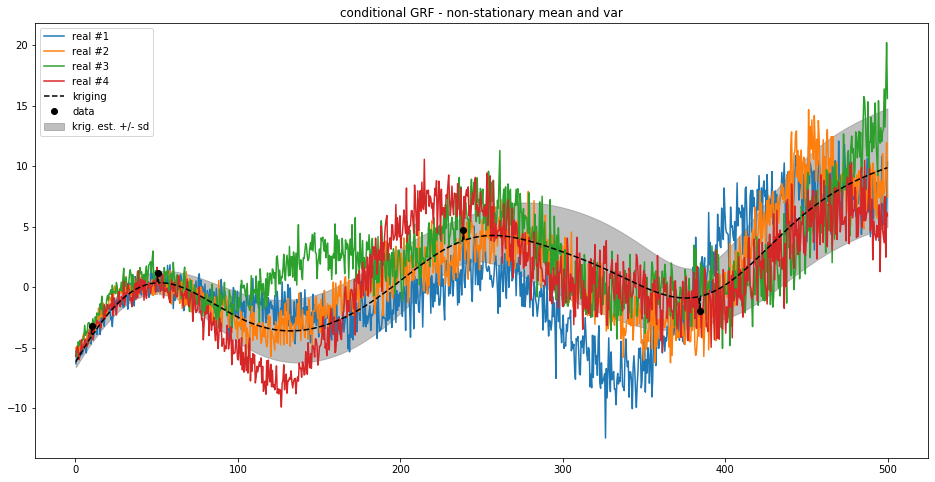

In [25]:
# Plot the first realizations of the previous simulation and the result of kriging.
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Dd[i], label='real #{}'.format(i+1))

plt.plot(xg, krig1Dd, c='black', ls='dashed', label='kriging')
plt.fill_between(xg, krig1Dd - krig1Dd_std, krig1Dd + krig1Dd_std, 
                 color='gray', alpha=.5, label='krig. est. +/- sd')
plt.plot(x, v, 'o', c='k', label='data') # add conditioning points
plt.legend()
plt.title('conditional GRF - non-stationary mean and var')
plt.show()

## Comparison of mean and standard deviation of all realizations with kriging results

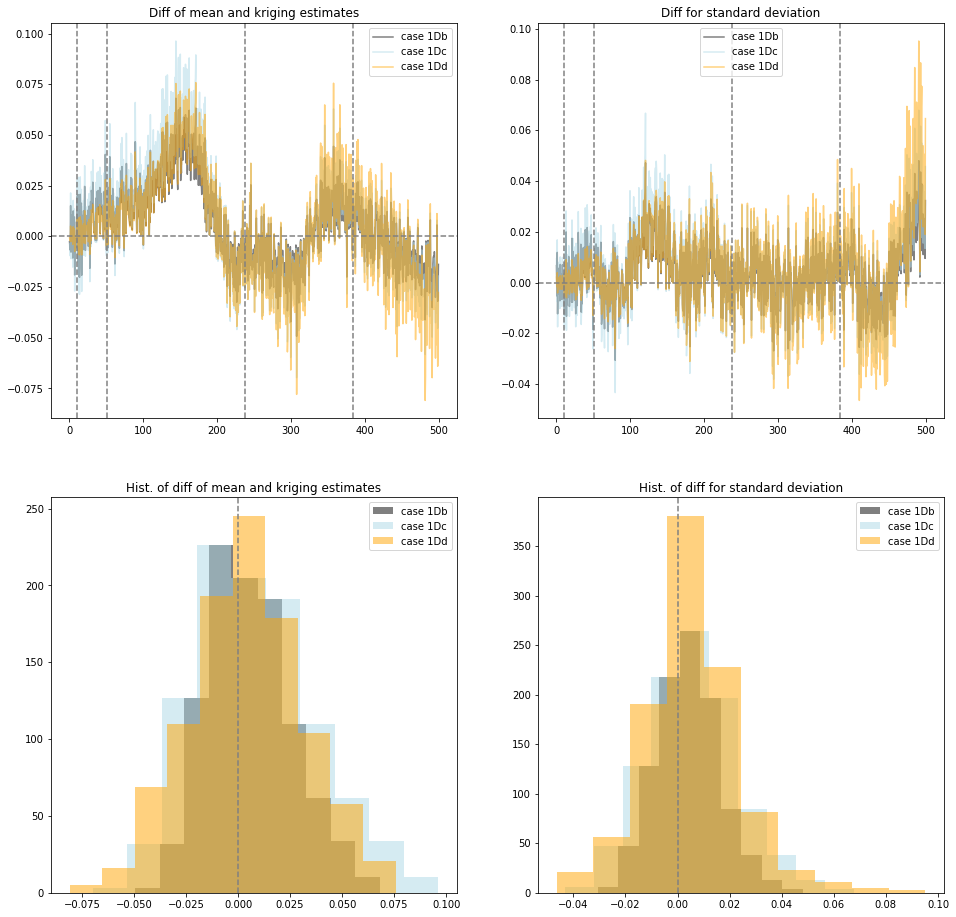

In [26]:
plt.subplots(2, 2, figsize=(16,16)) # 2 x 2 sub-plots

plt.subplot(2, 2, 1) # first sub-plot
plt.plot(xg, sim1Db_mean - krig1Db, c='black', alpha=0.5, label='case 1Db')
plt.plot(xg, sim1Dc_mean - krig1Dc, c='lightblue', alpha=0.5, label='case 1Dc')
plt.plot(xg, sim1Dd_mean - krig1Dd, c='orange', alpha=0.5, label='case 1Dd')
for xx in x:
    plt.axvline(x=xx, c='gray', ls='dashed') # vertical lines at conditioning points
plt.axhline(y=0, c='gray', ls='dashed') # horizontal line at zero
plt.legend()
plt.title('Diff of mean and kriging estimates')

plt.subplot(2, 2, 2) # second sub-plot
plt.plot(xg, sim1Db_std - krig1Db_std, c='black', alpha=0.5, label='case 1Db')
plt.plot(xg, sim1Dc_std - krig1Dc_std, c='lightblue', alpha=0.5, label='case 1Dc')
plt.plot(xg, sim1Dd_std - krig1Dd_std, c='orange', alpha=0.5, label='case 1Dd')
for xx in x:
    plt.axvline(x=xx, c='gray', ls='dashed') # vertical lines at conditioning points
plt.axhline(y=0, c='gray', ls='dashed') # horizontal line at zero
plt.legend()
plt.title('Diff for standard deviation')

plt.subplot(2, 2, 3) # third sub-plot
plt.hist(sim1Db_mean - krig1Db, color='black', alpha=0.5, label='case 1Db')
plt.hist(sim1Dc_mean - krig1Dc, color='lightblue', alpha=0.5, label='case 1Dc')
plt.hist(sim1Dd_mean - krig1Dd, color='orange', alpha=0.5, label='case 1Dd')
plt.axvline(x=0, c='gray', ls='dashed') # vertical line at zero
plt.legend()
plt.title('Hist. of diff of mean and kriging estimates')

plt.subplot(2, 2, 4) # fourth sub-plot
plt.hist(sim1Db_std - krig1Db_std, color='black', alpha=0.5, label='case 1Db')
plt.hist(sim1Dc_std - krig1Dc_std, color='lightblue', alpha=0.5, label='case 1Dc')
plt.hist(sim1Dd_std - krig1Dd_std, color='orange', alpha=0.5, label='case 1Dd')
plt.axvline(x=0, c='gray', ls='dashed') # vertical line at zero
plt.legend()
plt.title('Hist. of diff for standard deviation')
plt.show()